# PISA 2012 Dataset Exploration
## by Chung Qi Yong

## Preliminary Wrangling

This document explores the **Programme for International Student Assessment (PISA)** dataset.

PISA assesses the extent to which 15-year-old students have acquired key knowledge and skills that are essential for full participation in modern societies. The assessment, which focuses on reading, mathematics, science and problem-solving, does not just ascertain whether students can reproduce what they have learned; it also examines how well they can extrapolate from what they have learned and apply that knowledge in unfamiliar settings, both in and outside of school. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
pd.set_option('display.max_columns', 100)

In [2]:
# load in the dataset into a pandas dataframe, print statistics
df = pd.read_csv('pisa2012.csv', encoding='ISO-8859-1', low_memory=False, index_col=0)

In [3]:
df.head()

,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,ST03Q01,ST03Q02,ST04Q01,ST05Q01,ST06Q01,ST07Q01,ST07Q02,ST07Q03,ST08Q01,ST09Q01,ST115Q01,ST11Q01,ST11Q02,ST11Q03,ST11Q04,ST11Q05,ST11Q06,ST13Q01,ST14Q01,ST14Q02,ST14Q03,ST14Q04,ST15Q01,ST17Q01,ST18Q01,ST18Q02,ST18Q03,ST18Q04,ST19Q01,ST20Q01,ST20Q02,ST20Q03,ST21Q01,ST25Q01,ST26Q01,ST26Q02,ST26Q03,ST26Q04,ST26Q05,ST26Q06,ST26Q07,...,W_FSTR35,W_FSTR36,W_FSTR37,W_FSTR38,W_FSTR39,W_FSTR40,W_FSTR41,W_FSTR42,W_FSTR43,W_FSTR44,W_FSTR45,W_FSTR46,W_FSTR47,W_FSTR48,W_FSTR49,W_FSTR50,W_FSTR51,W_FSTR52,W_FSTR53,W_FSTR54,W_FSTR55,W_FSTR56,W_FSTR57,W_FSTR58,W_FSTR59,W_FSTR60,W_FSTR61,W_FSTR62,W_FSTR63,W_FSTR64,W_FSTR65,W_FSTR66,W_FSTR67,W_FSTR68,W_FSTR69,W_FSTR70,W_FSTR71,W_FSTR72,W_FSTR73,W_FSTR74,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU,VER_STU
1,Albania,80000,ALB0006,Non-OECD,Albania,1,1,10,1.0,2,1996,Female,No,6.0,"No, never","No, never","No, never",None,None,1.0,Yes,Yes,Yes,Yes,NaN,NaN,<ISCED level 3A>,No,No,No,No,"Other (e.g. home duties, retired)",<ISCED level 3A>,NaN,NaN,NaN,NaN,Working part-time <for pay>,Country of test,Country of test,Country of test,NaN,Language of the test,Yes,No,Yes,No,No,No,No,...,4.3389,4.3313,4.5084,4.5084,13.7954,4.5315,4.5084,4.5315,13.0829,4.5315,4.3313,4.5084,4.5084,13.7954,13.9235,4.3389,13.0829,13.9235,4.3389,4.3313,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,4.5084,4.5315,13.0829,4.5315,4.3313,4.5084,4.5084,13.7954,13.9235,4.3389,13.0829,13.9235,4.3389,4.3313,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
2,Albania,80000,ALB0006,Non-OECD,Albania,1,2,10,1.0,2,1996,Female,"Yes, for more than one year",7.0,"No, never","No, never","No, never",One or two times,None,1.0,Yes,Yes,NaN,Yes,NaN,NaN,<ISCED level 3A>,Yes,Yes,No,No,Working full-time <for pay>,<ISCED level 3A>,No,No,No,No,Working full-time <for pay>,Country of test,Country of test,Country of test,NaN,Language of the test,Yes,Yes,Yes,Yes,Yes,Yes,Yes,...,4.3389,4.3313,4.5084,4.5084,13.7954,4.5315,4.5084,4.5315,13.0829,4.5315,4.3313,4.5084,4.5084,13.7954,13.9235,4.3389,13.0829,13.9235,4.3389,4.3313,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,4.5084,4.5315,13.0829,4.5315,4.3313,4.5084,4.5084,13.7954,13.9235,4.3389,13.0829,13.9235,4.3389,4.3313,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
3,Albania,80000,ALB0006,Non-OECD,Albania,1,3,9,1.0,9,1996,Female,"Yes, for more than one year",6.0,"No, never","No, never","No, never",None,None,1.0,Yes,Yes,No,Yes,No,No,"<ISCED level 3B, 3C>",Yes,Yes,Yes,No,Working full-time <for pay>,<ISCED level 3A>,Yes,No,Yes,Yes,Working full-time <for pay>,Country of test,Country of test,Country of test,NaN,Language of the test,Yes,Yes,Yes,Yes,No,Yes,Yes,...,4.2436,4.2436,4.2436,4.2436,12.7307,4.2436,4.2436,4.2436,12.7307,4.2436,4.2436,4.2436,4.2436,12.7307,12.7307,4.2436,12.7307,12.7307,4.2436,4.2436,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,4.2436,4.2436,12.7307,4.2436,4.2436,4.2436,4.2436,12.7307,12.7307,4.2436,12.7307,12.7307,4.2436,4.2436,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
4,Albania,80000,ALB0006,Non-OECD,Albania,1,4,9,1.0,8,1996,Female,"Yes, for more than one year",6.0,"No, never","No, never","No, never",None,None,1.0,Yes,Yes,No,Yes,No,No,"<ISCED level 3B, 3C>",No,No,No,No,Working full-time <for pay>,<ISCED level 3A>,Yes,Yes,No,No,Working full-time <for pay>,Country of test,Country of test,Country of test,NaN,Language of the test,Yes,Yes,Yes,Yes,Yes,Yes,Yes,...,4.2436,4.2436,4.2436,4.2436,12.7307,4.2436,4.2436,4.2436,12.7307,4.2436,4.2436,4.2436,4.2436,12.7307,12.7307,4.2436,12.7307,12.7307,4.2436,4.2436,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,4.2436,4.2436,12.7307,4.2436,4.2436,4.2436,4.2436,12.7307,12.7307,4.2436,12.7307,12.7307,4.2436,4.2436,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
5,Albania,80000,ALB0006,Non-OECD,Albania,1,5,9,1.0,10,1996,Female,"Yes, for more than one year",6.0,"No, never","No, never",

In [4]:
# High-level overview of data shape and composition
df.shape # There are 485,490 rows and 635 columns.

(485490, 635)

In [5]:
# Show the data types of the columns
df.dtypes

CNT            object
SUBNATIO        int64
STRATUM        object
OECD           object
NC             object
SCHOOLID        int64
STIDSTD         int64
ST01Q01         int64
ST02Q01       float64
ST03Q01         int64
ST03Q02         int64
ST04Q01        object
ST05Q01        object
ST06Q01       float64
ST07Q01        object
ST07Q02        object
ST07Q03        object
ST08Q01        object
ST09Q01        object
ST115Q01      float64
ST11Q01        object
ST11Q02        object
ST11Q03        object
ST11Q04        object
ST11Q05        object
ST11Q06        object
ST13Q01        object
ST14Q01        object
ST14Q02        object
ST14Q03        object
               ...   
W_FSTR55      float64
W_FSTR56      float64
W_FSTR57      float64
W_FSTR58      float64
W_FSTR59      float64
W_FSTR60      float64
W_FSTR61      float64
W_FSTR62      float64
W_FSTR63      float64
W_FSTR64      float64
W_FSTR65      float64
W_FSTR66      float64
W_FSTR67      float64
W_FSTR68      float64
W_FSTR69  

In [6]:
# Descriptive statistics for numeric variables
df.describe()

,SUBNATIO,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,ST03Q01,ST03Q02,ST06Q01,ST115Q01,ST21Q01,ST26Q15,ST26Q16,ST26Q17,ST57Q01,ST57Q02,ST57Q03,ST57Q04,ST57Q05,ST57Q06,ST69Q01,ST69Q02,ST69Q03,ST70Q01,ST70Q02,ST70Q03,ST71Q01,ST72Q01,ST101Q01,ST101Q02,ST101Q03,ST101Q05,ST104Q01,ST104Q04,ST104Q05,ST104Q06,IC05Q01,IC06Q01,IC07Q01,EC04Q01A,EC04Q01B,EC04Q01C,EC04Q02A,EC04Q02B,EC04Q02C,EC04Q03A,EC04Q03B,EC04Q03C,EC04Q04A,EC04Q04B,EC04Q04C,...,W_FSTR34,W_FSTR35,W_FSTR36,W_FSTR37,W_FSTR38,W_FSTR39,W_FSTR40,W_FSTR41,W_FSTR42,W_FSTR43,W_FSTR44,W_FSTR45,W_FSTR46,W_FSTR47,W_FSTR48,W_FSTR49,W_FSTR50,W_FSTR51,W_FSTR52,W_FSTR53,W_FSTR54,W_FSTR55,W_FSTR56,W_FSTR57,W_FSTR58,W_FSTR59,W_FSTR60,W_FSTR61,W_FSTR62,W_FSTR63,W_FSTR64,W_FSTR65,W_FSTR66,W_FSTR67,W_FSTR68,W_FSTR69,W_FSTR70,W_FSTR71,W_FSTR72,W_FSTR73,W_FSTR74,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU
count,4.854900e+05,485490.000000,485490.000000,485490.000000,485438.000000,485490.000000,485490.000000,457994.000000,479269.000000,32728.000000,4.854900e+05,4.854900e+05,4.854900e+05,301367.000000,269808.000000,283813.000000,279657.000000,289502.000000,289428.000000,299618.000000,298601.000000,291943.000000,296878.000000,298339.000000,289068.000000,255665.000000,294163.000000,311290.000000,310906.000000,310321.00000,310655.000000,310449.000000,309969.000000,310366.000000,310156.000000,485490.000000,485490.000000,485490.000000,169730.000000,169765.000000,169779.000000,169783.000000,169784.000000,169798.000000,169796.000000,169786.000000,169799.000000,169655.000000,169641.00000,169656.000000,...,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.00000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000
mean,4.315457e+06,240.152197,6134.066201,9.813323,2.579260,6.558512,1996.070061,6.148963,1.265356,6.481117,7.103064e+05,7.268785e+05,8.130810e+05,5.493770,1.623629,0.954044,0.911821,1.213363,1.583081,52.744331,52.911273,52.722812,4.228060,4.350246,4.047826,31.138885,26.017759,1.831800,2.026944,2.83132,2.180995,1.879072,2.834719,1.963050,1.930719,39.524894,40.569633,41.019310,1.648448,1.462251,1.850506,1.755941,1.470916,1.761770,1.641782,1.698255,1.663773,1.737544,1.68622,1.583711,...,50.934120,50.960809,51.258724,50.996567,50.967408,50.655822,50.822744,51.009717,50.596088,50.740495,50.641955,51.115232,51.153540,51.242228,50.739218,51.375184,51.081902,50.974541,51.117503,50.960259,50.990849,51.115101,50.806238,50.598170,50.928356,51.207395,50.816763,50.983417,50.498705,51.227296,50.931417,50.702373,50.660514,51.274698,50.898586,50.964887,51.085841,50.85639,50.716749,50.709636,50.844201,51.020378,50.943149,50.685275,51.019842,50.540724,50.721164,40.013920,1.531189,0.140054
std,2.524434e+06,278.563016,6733.144944,3.734726,2.694013,3.705244,0.255250,0.970693,0.578992,4.579245,1.583832e+06,1.629829e+06,1.811846e+06,5.383815,2.591569,2.162574,2.362377,2.353292,2.760885,16.903873,17.007616,16.635498,1.652415,1.652565,2.539119,9.090506,9.223134,0.891414,0.914075,0.97202,0.909405,0.805788,0.998822,0.885696,0.854910,46.390983,45.463542,45.306261,0.477456,0.498574,0.356576,0.429529,0.499155,0.426002,0.479478,0.459016,0.472419,0.439971,0.46403,0.492944,...,121.965014,122.733971,126.769255,124.332223,122.566333,119.857651,124.417727,124.249714,117.967963,120.307004,119.419120,124.966911,123.245513,126.001133,122.298004,126.406935,126.330021,124.900210,126.135726,121.599760,122.039390,125.834607,122.886

In [7]:
# More statistics
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 485490 entries, 1 to 485490
Columns: 635 entries, CNT to VER_STU
dtypes: float64(250), int64(17), object(368)
memory usage: 2.3+ GB


In [8]:
# Number of countries
df['CNT'].nunique()

68

In [9]:
df['CNT'].unique()

array(['Albania', 'United Arab Emirates', 'Argentina', 'Australia',
       'Austria', 'Belgium', 'Bulgaria', 'Brazil', 'Canada',
       'Switzerland', 'Chile', 'Colombia', 'Costa Rica', 'Czech Republic',
       'Germany', 'Denmark', 'Spain', 'Estonia', 'Finland', 'France',
       'United Kingdom', 'Greece', 'Hong Kong-China', 'Croatia',
       'Hungary', 'Indonesia', 'Ireland', 'Iceland', 'Israel', 'Italy',
       'Jordan', 'Japan', 'Kazakhstan', 'Korea', 'Liechtenstein',
       'Lithuania', 'Luxembourg', 'Latvia', 'Macao-China', 'Mexico',
       'Montenegro', 'Malaysia', 'Netherlands', 'Norway', 'New Zealand',
       'Peru', 'Poland', 'Portugal', 'Qatar', 'China-Shanghai',
       'Perm(Russian Federation)', 'Florida (USA)', 'Connecticut (USA)',
       'Massachusetts (USA)', 'Romania', 'Russian Federation',
       'Singapore', 'Serbia', 'Slovak Republic', 'Slovenia', 'Sweden',
       'Chinese Taipei', 'Thailand', 'Tunisia', 'Turkey', 'Uruguay',
       'United States of America', 'Vietn

In [10]:
# Cleaning up the 'CNT' column

#'Florida (USA)', 'Connecticut (USA)', 'Massachusetts (USA)' should be renamed as 'United States of America'.
df.loc[df['CNT']=='Florida (USA)', 'CNT'] = 'United States of America'
df.loc[df['CNT']=='Connecticut (USA)', 'CNT'] = 'United States of America'
df.loc[df['CNT']=='Massachusetts (USA)', 'CNT'] = 'United States of America'

# 'Perm(Russian Federation)' should be renamed as 'Russian Federation'.
df.loc[df['CNT']=='Perm(Russian Federation)', 'CNT'] = 'Russian Federation'

In [11]:
# Number of countries
df['CNT'].nunique()

64

In [12]:
df['CNT'].unique()

array(['Albania', 'United Arab Emirates', 'Argentina', 'Australia',
       'Austria', 'Belgium', 'Bulgaria', 'Brazil', 'Canada',
       'Switzerland', 'Chile', 'Colombia', 'Costa Rica', 'Czech Republic',
       'Germany', 'Denmark', 'Spain', 'Estonia', 'Finland', 'France',
       'United Kingdom', 'Greece', 'Hong Kong-China', 'Croatia',
       'Hungary', 'Indonesia', 'Ireland', 'Iceland', 'Israel', 'Italy',
       'Jordan', 'Japan', 'Kazakhstan', 'Korea', 'Liechtenstein',
       'Lithuania', 'Luxembourg', 'Latvia', 'Macao-China', 'Mexico',
       'Montenegro', 'Malaysia', 'Netherlands', 'Norway', 'New Zealand',
       'Peru', 'Poland', 'Portugal', 'Qatar', 'China-Shanghai',
       'Russian Federation', 'United States of America', 'Romania',
       'Singapore', 'Serbia', 'Slovak Republic', 'Slovenia', 'Sweden',
       'Chinese Taipei', 'Thailand', 'Tunisia', 'Turkey', 'Uruguay',
       'Vietnam'], dtype=object)

After doing some data cleaning, there are 64 unique countries represented in the dataset.

### What is the structure of your dataset?

There are 485,490 students covered in the dataset with 635 features. 64 countries are represented. Some interesting features include attributes such as country, gender, parents' academic qualifications and the family wealth (e.g. possession of own room or Internet). The features are a mix of either categorical/ordinal in nature (such as parents' educational qualifications), or numeric in nature (such as maths, reading and science scores).

### What is/are the main feature(s) of interest in your dataset?

- What are the general scores for maths, reading and science?
- Are there differences in achievement based on gender or location (country)?
- Are there differences in achievement based on parents' educational qualifications?
- Does there exist inequality in academic achievement based on family wealth?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that Family Wealth will have the strongest effect on each student's scores for maths, reading and science. I will also investigate if the educational qualifications of the parents play a part in influencing the scores as well.

## Data Exploration

### Maths Score

I'll start by looking at the distribution of variable of interest: **Maths Score**.

In [13]:
df['PV1MATH'].describe()

count    485490.000000
mean        469.621653
std         103.265391
min          19.792800
25%         395.318600
50%         466.201900
75%         541.057800
max         962.229300
Name: PV1MATH, dtype: float64

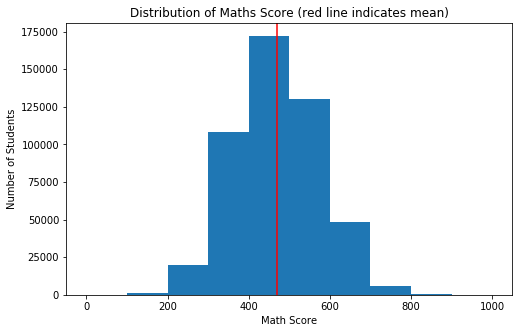

In [14]:
# Start with a standard-scaled plot
binsize = 100
bins = np.arange(0, df['PV1MATH'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data=df, x='PV1MATH', bins = bins)
plt.title('Distribution of Maths Score (red line indicates mean)')
plt.xlabel('Math Score')
plt.ylabel('Number of Students')
plt.axvline(df['PV1MATH'].mean(), color='r')
plt.show()

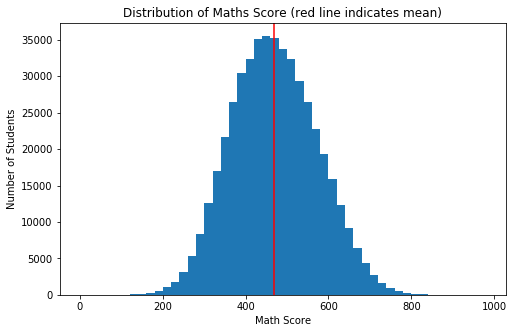

In [15]:
# Investigating further on an even smaller bin size
binsize = 20
bins = np.arange(0, df['PV1MATH'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data=df, x='PV1MATH', bins = bins)
plt.title('Distribution of Maths Score (red line indicates mean)')
plt.xlabel('Math Score')
plt.ylabel('Number of Students')
plt.axvline(df['PV1MATH'].mean(), color='r')
plt.show()

The math score looks normally distributed, with the mean of about 470, and an overall range of slightly below 200 to slightly above 800. There does not look to be any significant outliers/spikes outside 200 and 800.

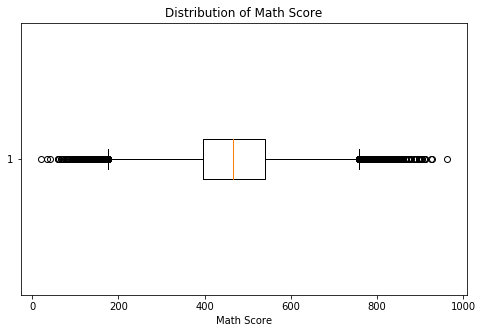

In [16]:
# Visualise on a box-plot
plt.figure(figsize=[8, 5])
plt.boxplot(data=df, x='PV1MATH', vert=False)
plt.title('Distribution of Math Score')
plt.xlabel('Math Score')
plt.show()

The box plot shows the visual distribution of the math score. The median is around 470, with 25% and 75% percentiles around 400 and 550 respectively. Here we can see that there are a number of outliers beyond the min and max IQR lines.

### Reading Score

Next, let's look at the distribution of variable of interest: **Reading Score**.

In [17]:
df['PV1READ'].describe()

count    485490.000000
mean        472.004640
std         102.505523
min           0.083400
25%         403.600700
50%         475.455000
75%         544.502500
max         904.802600
Name: PV1READ, dtype: float64

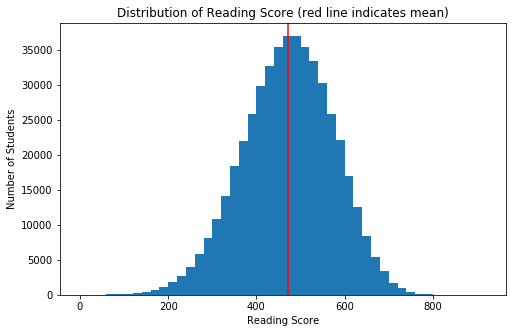

In [18]:
# Start with a standard-scaled plot
binsize = 20
bins = np.arange(0, df['PV1READ'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data=df, x='PV1READ', bins = bins)
plt.title('Distribution of Reading Score (red line indicates mean)')
plt.xlabel('Reading Score')
plt.ylabel('Number of Students')
plt.axvline(df['PV1READ'].mean(), color='r')
plt.show()

The reading score looks normally distributed with a very slight left skew. The mean is around 470, and an overall range of about 50 to about 800. There does not look to be any significant outliers/spikes.

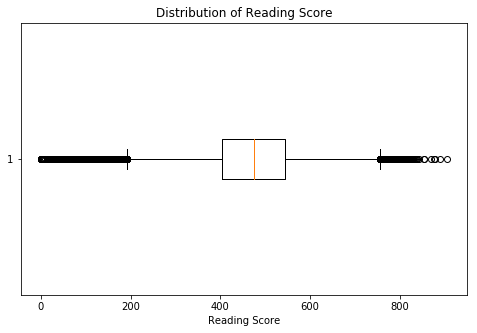

In [19]:
# Visualise on a box-plot
plt.figure(figsize=[8, 5])
plt.boxplot(data=df, x='PV1READ', vert=False)
plt.title('Distribution of Reading Score')
plt.xlabel('Reading Score')
plt.show()

The box plot shows the visual distribution of the reading score. The median is around 475, with 25% and 75% percentiles around 400 and 550 respectively. Here we can see that there are a number of outliers beyond the min and max IQR lines.

### Science Score

Next, let's look at the distribution of variable of interest: Science Score.

In [20]:
df['PV1SCIE'].describe()

count    485490.000000
mean        475.769824
std         101.464426
min           2.648300
25%         404.457300
50%         475.699400
75%         547.780700
max         903.338300
Name: PV1SCIE, dtype: float64

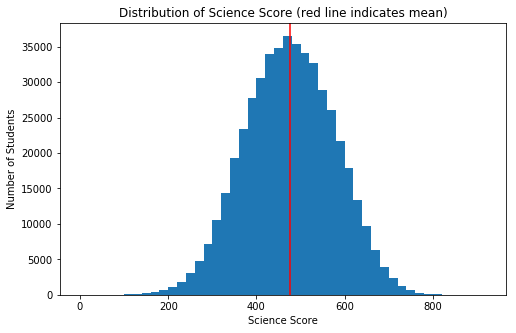

In [21]:
# Start with a standard-scaled plot
binsize = 20
bins = np.arange(0, df['PV1SCIE'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data=df, x='PV1SCIE', bins = bins)
plt.title('Distribution of Science Score (red line indicates mean)')
plt.xlabel('Science Score')
plt.ylabel('Number of Students')
plt.axvline(df['PV1SCIE'].mean(), color='r')
plt.show()

### Gender

Next, we look at the distribution of variable of interest: **Gender**.

In [22]:
# Distribution by gender
df['ST04Q01'].value_counts()

Female    245064
Male      240426
Name: ST04Q01, dtype: int64

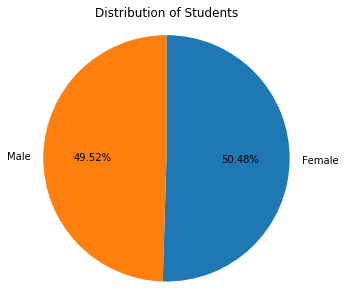

In [23]:
labels = ['Female', 'Male']
plt.figure(figsize=[8, 5])
plt.pie(df['ST04Q01'].value_counts(), labels=labels, autopct='%.2f%%', startangle=90, counterclock=False, )
plt.axis('square')
plt.title('Distribution of Students');

We see that the proportion of male and female students in the dataset are roughly equal. This is quite a balanced dataset in terms of gender representation.

Next, we investigate the mean math score according to gender.

In [24]:
# Grouping the maths score according to gender.
df.groupby('ST04Q01').mean()['PV1MATH']

ST04Q01
Female    464.033534
Male      475.317572
Name: PV1MATH, dtype: float64

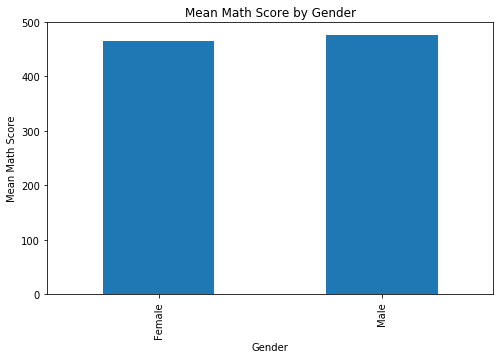

In [25]:
# Grouping the maths score according to gender.
plt.figure(figsize=[8, 5])
df.groupby('ST04Q01').mean()['PV1MATH'].plot(kind='bar')
plt.title('Mean Math Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Mean Math Score')
plt.show()

The bar chart shows that the mean math score for female and male students are roughly the same. Let's take a look at the actual distribution of the math score for the genders.

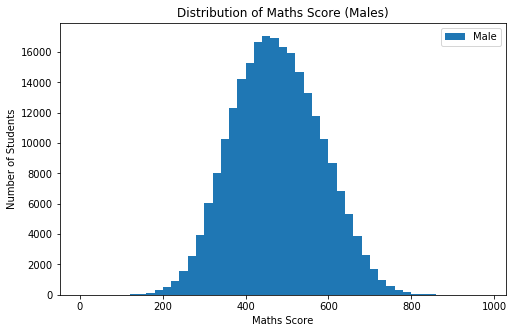

In [26]:
# Histogram for males' maths scores
binsize = 20
bins = np.arange(0, df['PV1MATH'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data=df[df['ST04Q01']=='Male'], x='PV1MATH', bins = bins, label='Male')
plt.title('Distribution of Maths Score (Males)')
plt.xlabel('Maths Score')
plt.ylabel('Number of Students')
plt.legend()
plt.show()

The math score for males looks normally distributed, with the mean roughly between 400 to 450, and an overall range of slightly below 200 to slightly above 800.

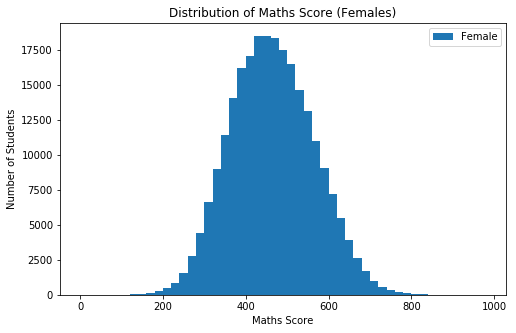

In [27]:
# Histogram for females' maths scores
binsize = 20
bins = np.arange(0, df['PV1MATH'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data=df[df['ST04Q01']=='Female'], x='PV1MATH', bins = bins, label='Female')
plt.title('Distribution of Maths Score (Females)')
plt.xlabel('Maths Score')
plt.ylabel('Number of Students')
plt.legend()
plt.show()

The math score for females looks normally distributed, with the mean roughly between 400 to 450, and an overall range of slightly below 200 to slightly above 800.

Let's take a look at the math scores for both males and females on the same histogram.

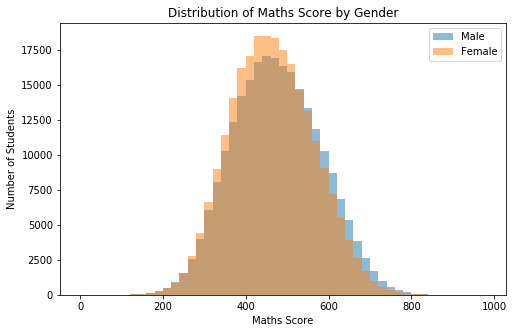

In [28]:
# Histogram for both males and females' maths scores
binsize = 20
bins = np.arange(0, df['PV1MATH'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data=df[df['ST04Q01']=='Male'], x='PV1MATH', bins = bins, label='Male', alpha=0.5)
plt.hist(data=df[df['ST04Q01']=='Female'], x='PV1MATH', bins = bins, label='Female', alpha=0.5)
plt.title('Distribution of Maths Score by Gender')
plt.xlabel('Maths Score')
plt.ylabel('Number of Students')
plt.legend()
plt.show()

Interestingly, it can be observed that the math scores for males and females looks very similar - normally distributed, with similar means (roughly between 400 to 450) and similar range (slightly below 200 to slightly above 800). Overall there does not look to be any significant difference in the math score between the genders, with the small exception of a higher peak for females at the mean (i.e. more female students having mean scores for maths compared to male students)

### Country

Next, we look at the distribution of variable of interest: **Country**.

In [29]:
# Number of countries
df['CNT'].nunique()

64

There are 64 unique countries represented in the dataset.

What is the number of students represented for each country?

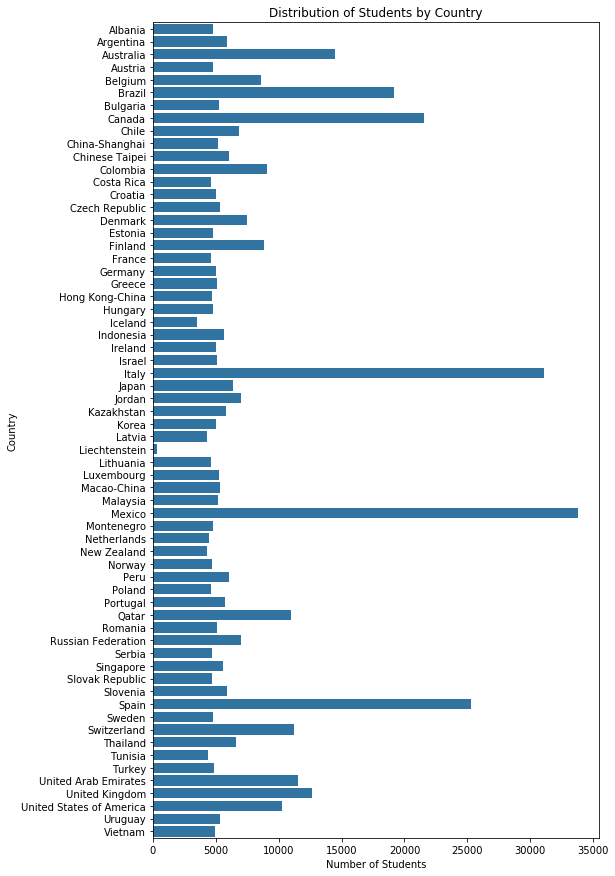

In [30]:
# Start by visualising the number of students represented per country.
plt.figure(figsize=[8, 15])
base_color = sb.color_palette()[0]
sb.countplot(data=df.sort_values(by='CNT'), y='CNT', color=base_color);
plt.title('Distribution of Students by Country')
plt.xlabel('Number of Students')
plt.ylabel('Country')
plt.show()

We can see that there are a significant number of students represented from Mexico, Italy and Spain in the dataset.

What is the number of students represented in terms of OECD and non-OECD countries?

In [31]:
# Distribution by OECD country
df['OECD'].value_counts()

OECD        295416
Non-OECD    190074
Name: OECD, dtype: int64

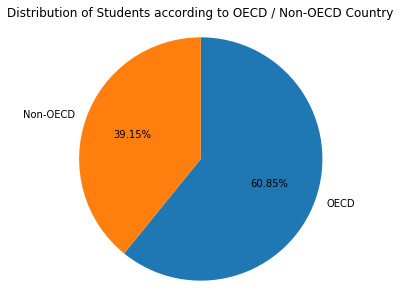

In [32]:
labels = ['OECD', 'Non-OECD']
plt.figure(figsize=[8, 5])
plt.pie(df['OECD'].value_counts(), labels=labels, autopct='%.2f%%', startangle=90, counterclock=False, )
plt.axis('square')
plt.title('Distribution of Students according to OECD / Non-OECD Country');

From the pie chart, we can see that the proportion of students represented by OECD countries is about 60%, significantly higher compared to 39% for non-OECD countries.

Next, we investigate the mean math score according to each country.

In [33]:
# Statistics for math score
df['PV1MATH'].describe()

count    485490.000000
mean        469.621653
std         103.265391
min          19.792800
25%         395.318600
50%         466.201900
75%         541.057800
max         962.229300
Name: PV1MATH, dtype: float64

In [34]:
# Mean math score by country (alphabetical order)
df.groupby('CNT').mean()['PV1MATH']

CNT
Albania                     395.296185
Argentina                   395.402241
Australia                   492.842855
Austria                     507.711753
Belgium                     519.868902
Brazil                      382.500793
Bulgaria                    442.158361
Canada                      509.328982
Chile                       444.419644
China-Shanghai              610.547030
Chinese Taipei              557.576851
Colombia                    386.185442
Costa Rica                  406.093702
Croatia                     469.833121
Czech Republic              519.774978
Denmark                     486.185453
Estonia                     521.805050
Finland                     507.525776
France                      499.470436
Germany                     513.932189
Greece                      453.890068
Hong Kong-China             561.274096
Hungary                     485.390840
Iceland                     493.147077
Indonesia                   376.071790
Ireland              

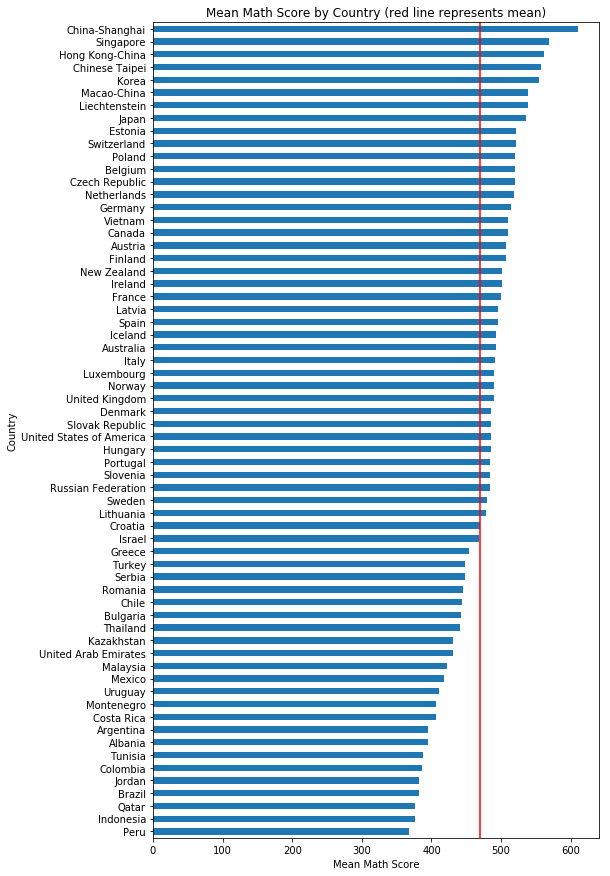

In [35]:
plt.figure(figsize=[8, 15])
df.groupby('CNT').mean()['PV1MATH'].sort_values(ascending=True).plot(kind='barh')
plt.title('Mean Math Score by Country (red line represents mean)')
plt.xlabel('Mean Math Score')
plt.ylabel('Country')
plt.axvline(df['PV1MATH'].mean(), color='r')
plt.show()

The top 3 countries with the highest mean maths scores are China-Shanghai, Singapore and Hong Kong-China. They are all non-OECD countries.

The bottom 3 countries with the lowest mean maths scores are Peru, Indonesia and Qatar. They are all non-OECD countries.

Next, we investigate the mean math score according to OECD and non-OECD countries.

In [36]:
# Mean math score by OECD / non-OECD country
df.groupby('OECD').mean()['PV1MATH']

OECD
Non-OECD    440.517225
OECD        488.347772
Name: PV1MATH, dtype: float64

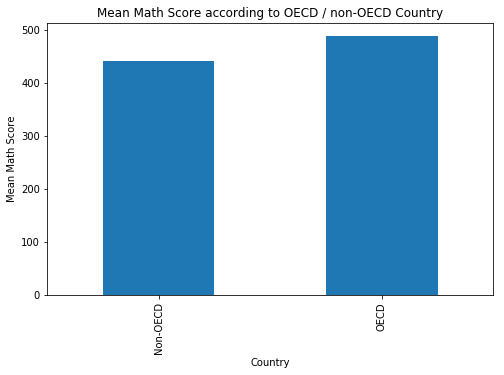

In [37]:
plt.figure(figsize=[8, 5])
df.groupby('OECD').mean()['PV1MATH'].plot(kind='bar')
plt.title('Mean Math Score according to OECD / non-OECD Country')
plt.xlabel('Country')
plt.ylabel('Mean Math Score')
plt.show()

The bar chart shows that students from  OECD countries have a higher mean score (488) compared to students from non-OECD countries (440). Next, I am interested to find out more about the actual distribution of the math score for OECD and non-OECD countries.

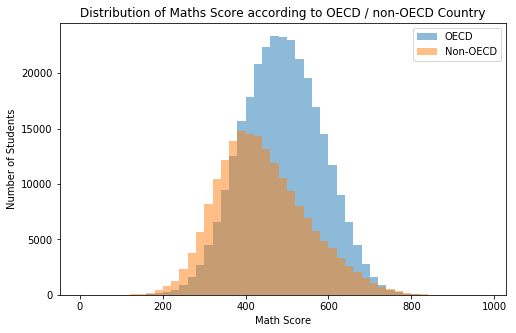

In [38]:
# Histogram for both males and females' maths scores
binsize = 20
bins = np.arange(0, df['PV1MATH'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data=df[df['OECD']=='OECD'], x='PV1MATH', bins = bins, label='OECD', alpha=0.5)
plt.hist(data=df[df['OECD']=='Non-OECD'], x='PV1MATH', bins = bins, label='Non-OECD', alpha=0.5)
plt.title('Distribution of Maths Score according to OECD / non-OECD Country')
plt.xlabel('Math Score')
plt.ylabel('Number of Students')
plt.legend()
plt.show()

For OECD countries, the math score looks normally distributed with a mean score around 500, with a peak of more than 20000 students achieving the mean score.

For non-OECD countries, the math score looks slightly right-skewed (i.e. more students obtain lower scores). Compared with OECD countries, the mean math score for non-OECD countries looks lower at about 400, with a lower peak of about 15000 students.

Let's investigate into the distribution of the maths score for the OECD countries.

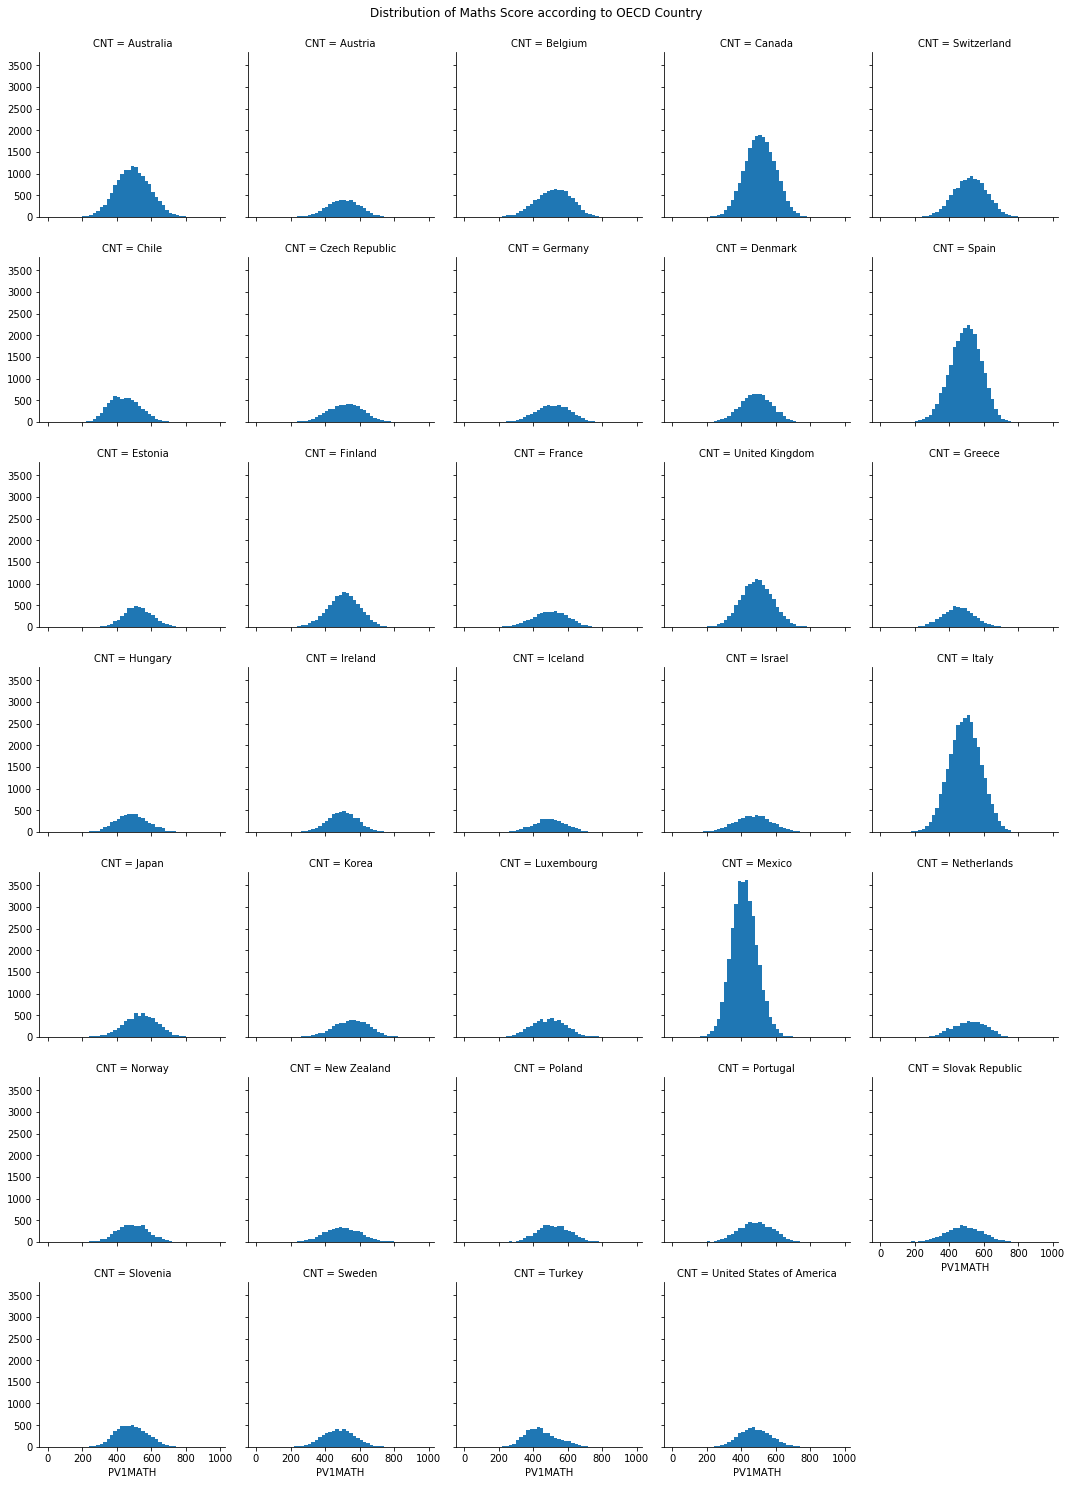

In [39]:
# FacetGrid for distribution of maths score according to OECD country
binsize = 20
bins = np.arange(0, df['PV1MATH'].max()+binsize, binsize)

g = sb.FacetGrid(df[df['OECD']=='OECD'], col='CNT', col_wrap=5, margin_titles=True)
g.map(plt.hist, 'PV1MATH', bins = bins)
g.fig.subplots_adjust(top=0.95)
g.fig.suptitle('Distribution of Maths Score according to OECD Country');

There are some countries with sharp peaks at the mean such as Canada, Spain, Italy and Mexico. Other countries have distributions that are not as steep and are more mild in comparison.

Let's investigate further into the distribution of the maths score for the non-OECD countries.

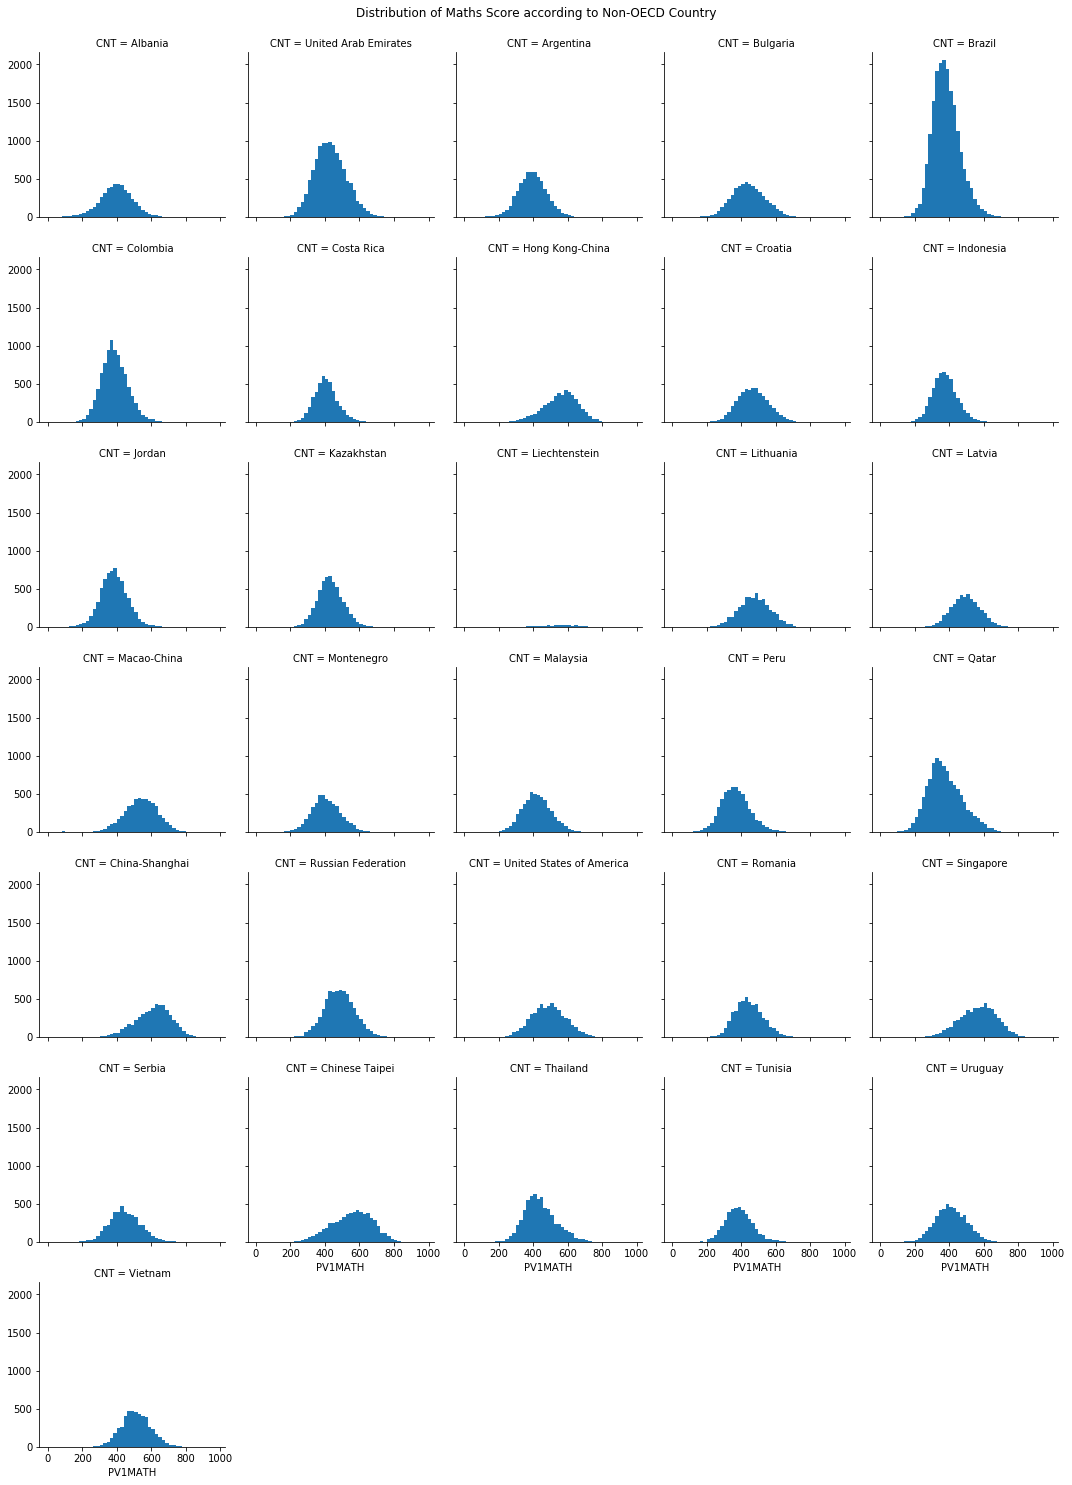

In [40]:
# FacetGrid for distribution of maths score according to non-OECD country
binsize = 20
bins = np.arange(0, df['PV1MATH'].max()+binsize, binsize)

g = sb.FacetGrid(df[df['OECD']=='Non-OECD'], col='CNT', col_wrap=5, margin_titles=True)
g.map(plt.hist, 'PV1MATH', bins = bins)
g.fig.subplots_adjust(top=0.95)
g.fig.suptitle('Distribution of Maths Score according to Non-OECD Country');

For non-OECD countries, we can see that not all the maths score distributions are symmetical about the mean. Some are skewed such as Chinese Taipei and Singapore. Interestingly, the distribution for Liechtenstein is almost totally flat.

On this note, let's also investigate the distribution of the maths scores between the genders. At an aggregated level as shown above, there does not seem to be a significant difference in the maths scores between male and female students. Let's drill down by country to see if there are any trends.

First let's look at the OECD countries.

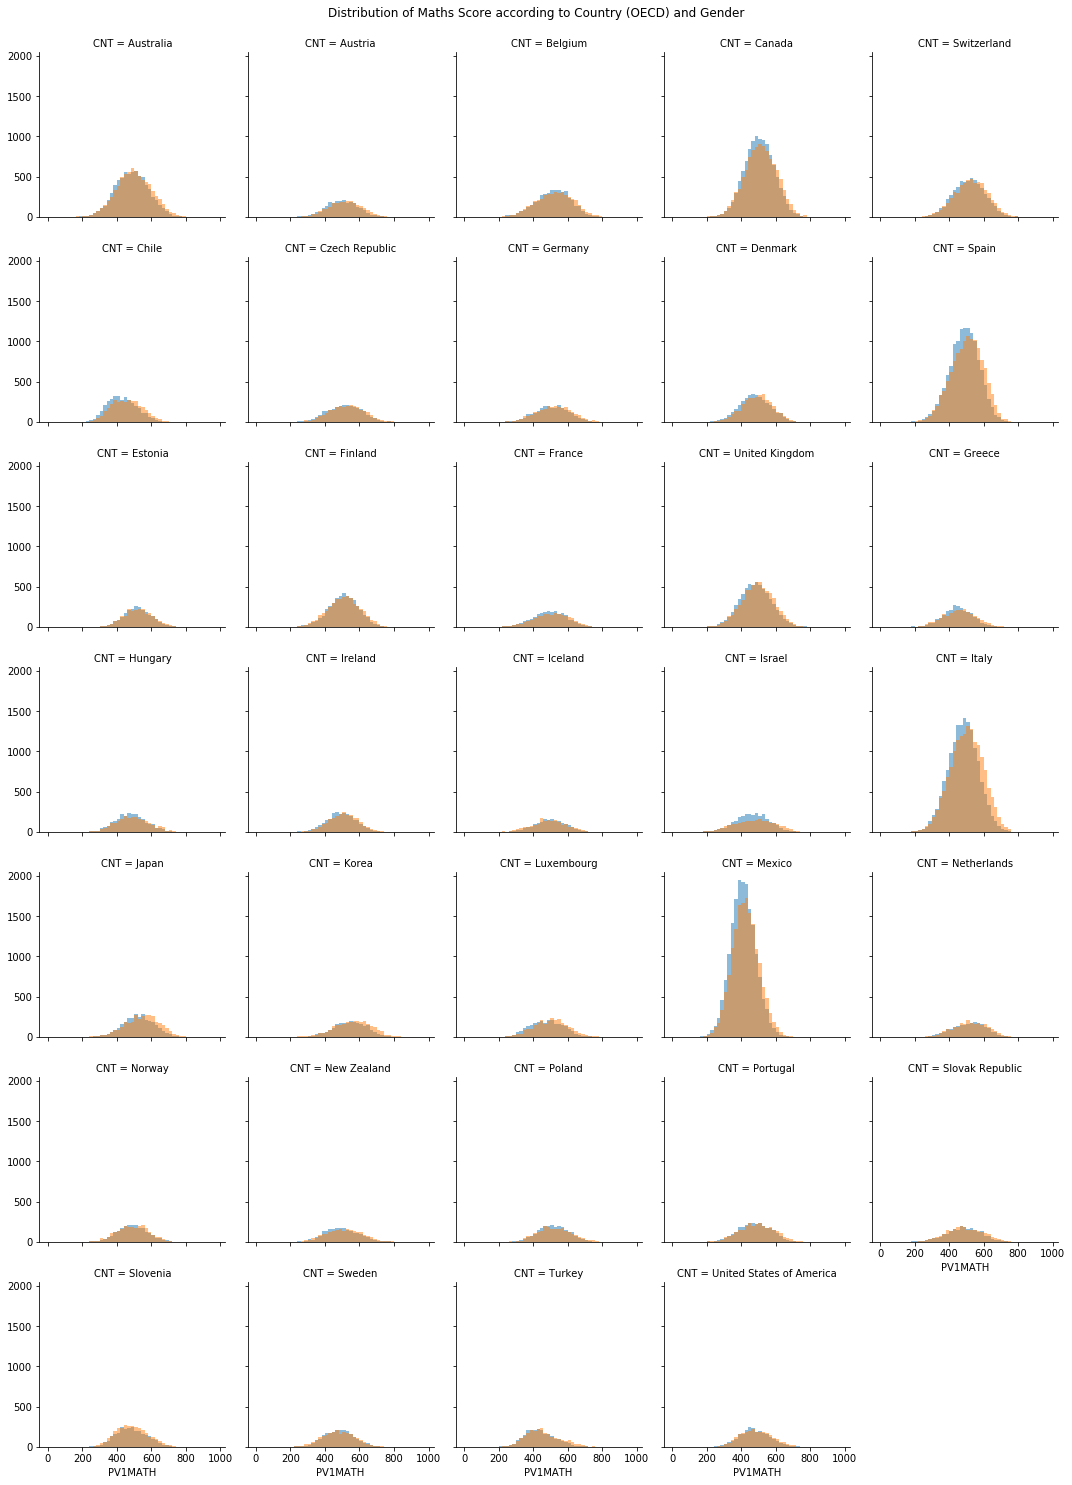

In [41]:
# FacetGrid for distribution of maths score according to country (OECD) and gender
binsize = 20
bins = np.arange(0, df['PV1MATH'].max()+binsize, binsize)

g = sb.FacetGrid(df[df['OECD']=='OECD'], col='CNT', hue='ST04Q01', col_wrap=5, margin_titles=True)
g.map(plt.hist, 'PV1MATH', bins = bins, alpha=0.5)
g.fig.subplots_adjust(top=0.95)
g.fig.suptitle('Distribution of Maths Score according to Country (OECD) and Gender');

We can see that in general, there is no major difference in the distribution for the maths score according to gender, for all the OECD countries.

Next, let's look at the non-OECD countries.

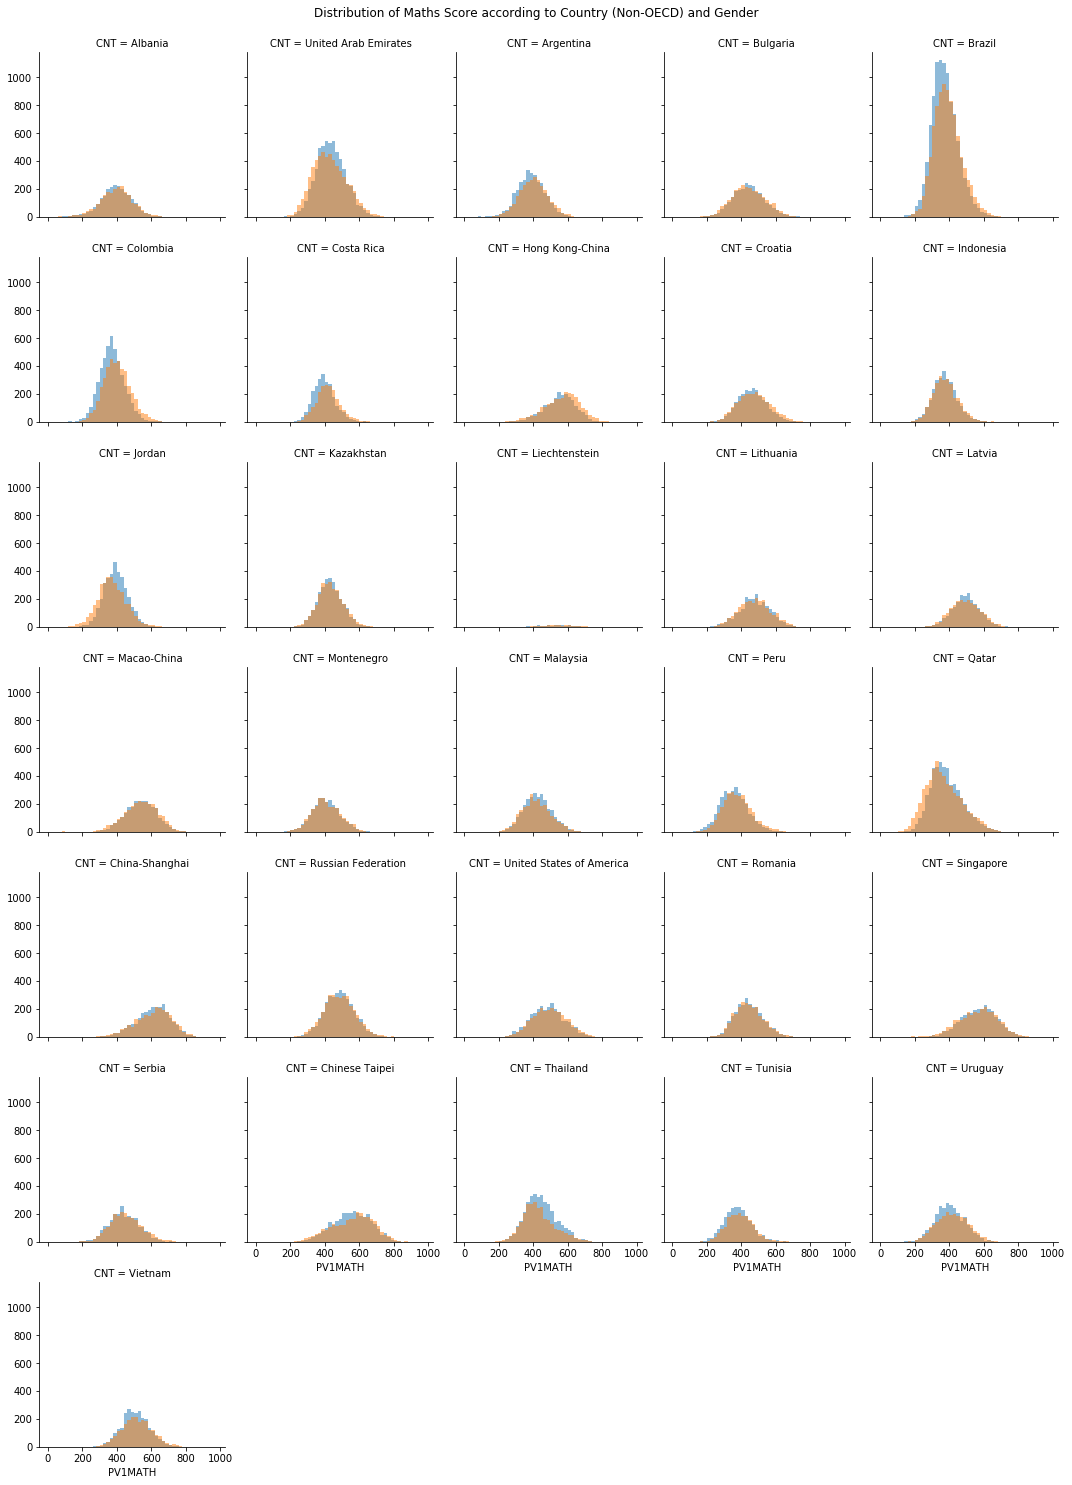

In [42]:
# FacetGrid for distribution of maths score according to country (non-OECD) and gender
binsize = 20
bins = np.arange(0, df['PV1MATH'].max()+binsize, binsize)

g = sb.FacetGrid(df[df['OECD']=='Non-OECD'], col='CNT', hue='ST04Q01', col_wrap=5, margin_titles=True)
g.map(plt.hist, 'PV1MATH', bins = bins, alpha=0.5)
g.fig.subplots_adjust(top=0.95)
g.fig.suptitle('Distribution of Maths Score according to Country (Non-OECD) and Gender');

We can see that in general, there is no major difference in the distribution for the maths score according to gender, for all the non-OECD countries, with an exception for United Arab Emirates, Colombia and Thailand where there is slightly more difference in the distributions between the genders.

### Parents' Qualifications

Let's take a look at the parents' (mother and father) educational qualifications.

Let's start with the data for the mother.

In [43]:
df['ST13Q01'].value_counts()

<ISCED level 3A>                         236993
<ISCED level 3B, 3C>                      83048
<ISCED level 2>                           82614
<ISCED level 1>                           36556
She did not complete <ISCED level 1>      18768
Name: ST13Q01, dtype: int64

In [44]:
mother_order = ['She did not complete <ISCED level 1> ', '<ISCED level 1> ', 
                '<ISCED level 2> ', '<ISCED level 3B, 3C> ', '<ISCED level 3A> ']
mother_cat = pd.api.types.CategoricalDtype(ordered = True, categories = mother_order)
df['ST13Q01'] = df['ST13Q01'].astype(mother_cat)

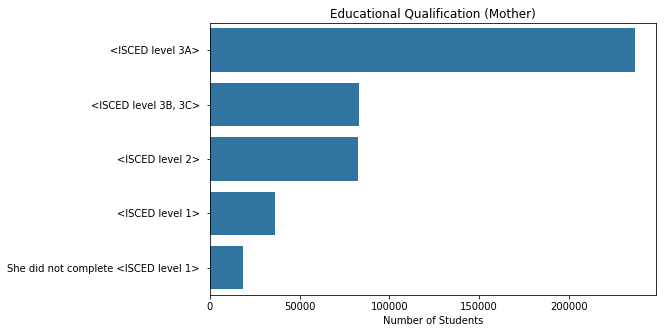

In [45]:
plt.figure(figsize=[8, 5])
base_color = sb.color_palette()[0]
sb.countplot(data=df, y='ST13Q01', color=base_color, order = df['ST13Q01'].value_counts().index)
plt.title('Educational Qualification (Mother)')
plt.xlabel('Number of Students')
plt.ylabel('');

Let's take a look at how the educational qualifications of the mother is correlated with the mean score for the student.

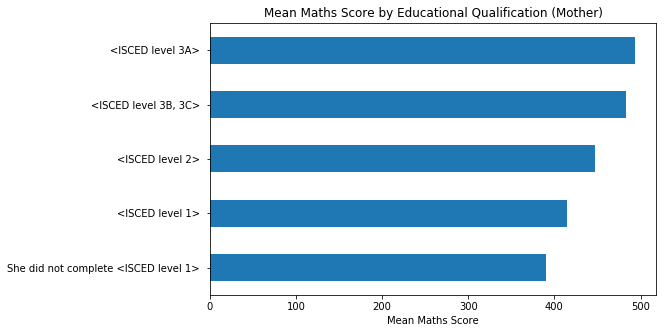

In [46]:
# Mean Maths Score
plt.figure(figsize=[8, 5])
df.groupby('ST13Q01').mean()['PV1MATH'].sort_values(ascending=True).plot(kind='barh')
plt.title('Mean Maths Score by Educational Qualification (Mother)')
plt.xlabel('Mean Maths Score')
plt.ylabel('')
plt.show()

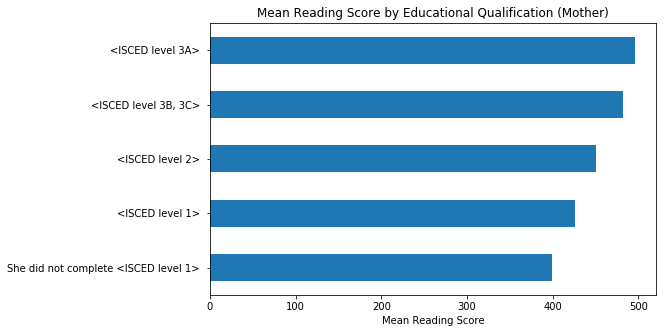

In [47]:
# Mean Reading Score
plt.figure(figsize=[8, 5])
df.groupby('ST13Q01').mean()['PV1READ'].sort_values(ascending=True).plot(kind='barh')
plt.title('Mean Reading Score by Educational Qualification (Mother)')
plt.xlabel('Mean Reading Score')
plt.ylabel('')
plt.show()

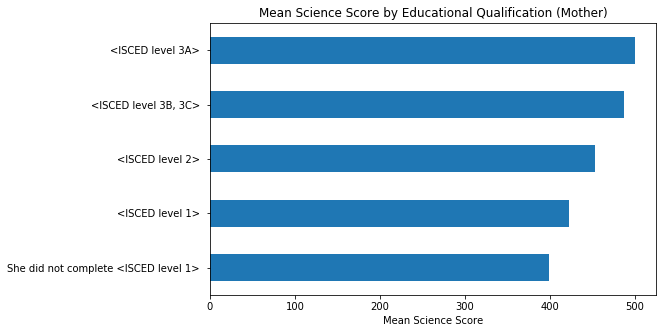

In [48]:
# Mean Science Score
plt.figure(figsize=[8, 5])
df.groupby('ST13Q01').mean()['PV1SCIE'].sort_values(ascending=True).plot(kind='barh')
plt.title('Mean Science Score by Educational Qualification (Mother)')
plt.xlabel('Mean Science Score')
plt.ylabel('')
plt.show()

Next, let's see the data for the father.

In [49]:
df['ST17Q01'].value_counts()

<ISCED level 3A>                        215280
<ISCED level 3B, 3C>                     91179
<ISCED level 2>                          84329
<ISCED level 1>                          35938
He did not complete <ISCED level 1>      16535
Name: ST17Q01, dtype: int64

In [50]:
father_order = ['He did not complete <ISCED level 1> ', '<ISCED level 1> ', 
                '<ISCED level 2> ', '<ISCED level 3B, 3C> ', '<ISCED level 3A> ']
father_cat = pd.api.types.CategoricalDtype(ordered = True, categories = father_order)
df['ST17Q01'] = df['ST17Q01'].astype(father_cat)

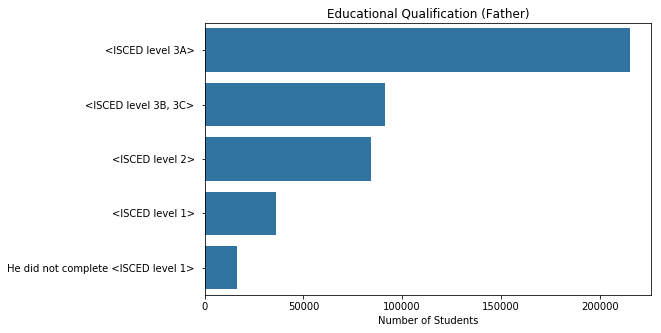

In [51]:
plt.figure(figsize=[8, 5])
base_color = sb.color_palette()[0]
sb.countplot(data=df, y='ST17Q01', color=base_color, order = df['ST17Q01'].value_counts().index)
plt.title('Educational Qualification (Father)')
plt.xlabel('Number of Students')
plt.ylabel('');

Let's take a look at how the educational qualifications of the mother is correlated with the mean score for the student.

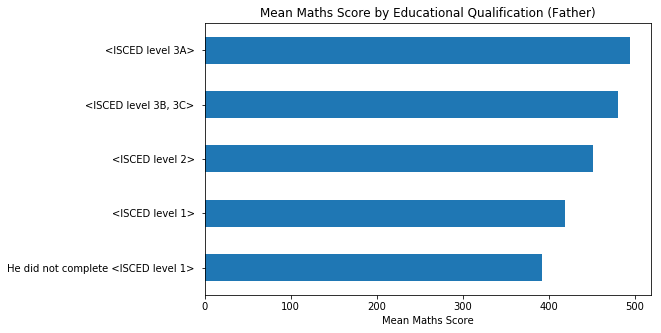

In [52]:
# Mean Maths Score
plt.figure(figsize=[8, 5])
df.groupby('ST17Q01').mean()['PV1MATH'].sort_values(ascending=True).plot(kind='barh')
plt.title('Mean Maths Score by Educational Qualification (Father)')
plt.xlabel('Mean Maths Score')
plt.ylabel('')
plt.show()

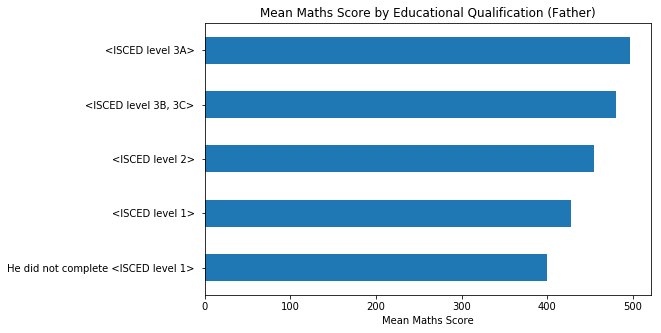

In [53]:
# Mean Reading Score
plt.figure(figsize=[8, 5])
df.groupby('ST17Q01').mean()['PV1READ'].sort_values(ascending=True).plot(kind='barh')
plt.title('Mean Maths Score by Educational Qualification (Father)')
plt.xlabel('Mean Maths Score')
plt.ylabel('')
plt.show()

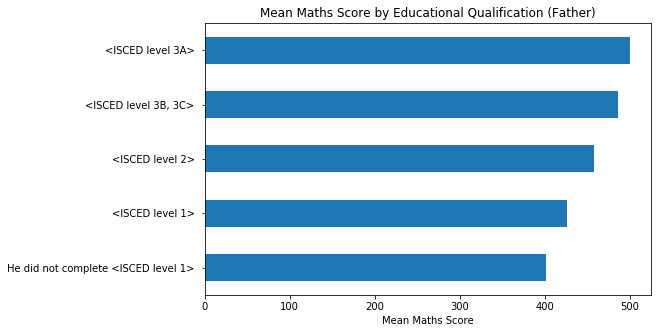

In [54]:
# Mean Science Score
plt.figure(figsize=[8, 5])
df.groupby('ST17Q01').mean()['PV1SCIE'].sort_values(ascending=True).plot(kind='barh')
plt.title('Mean Maths Score by Educational Qualification (Father)')
plt.xlabel('Mean Maths Score')
plt.ylabel('')
plt.show()

We can see that in general, the higher the educational qualification of the parents, the better the mean scores in maths, reading and science for the students.

### Family Wealth

Let's investigate if family wealth has any effect on the scores for maths.

We can use the following codes as indicators of family wealth possessions.

Reference: <https://www.oecd.org/pisa/sitedocument/PISA-2015-Technical-Report-Chapter-16-Procedures-and-Construct-Validation-of-Context-Questionnaire-Data.pdf>   
        
- ST26Q02: Possessions (own room)
- ST26Q06: Possessions (Internet)
- ST27Q01: How many cellular phones
- ST27Q02: How many televisions
- ST27Q03: How many computers
- ST27Q04: How many cars
- ST28Q01: How many books at home

#### Possessions (own room)

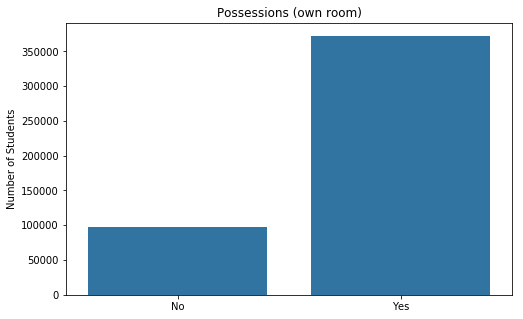

In [55]:
# ST26Q02: Possessions (own room)
plt.figure(figsize=[8, 5])
base_color = sb.color_palette()[0]
sb.countplot(data=df, x='ST26Q02', color=base_color)
plt.title('Possessions (own room)')
plt.xlabel('')
plt.ylabel('Number of Students')
plt.show()

The majority of the students are in possession of their own room.

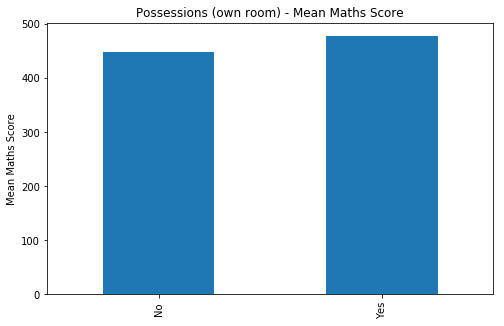

In [56]:
# ST26Q02: Possessions (own room) - Mean Maths Score
plt.figure(figsize=[8, 5])
df.groupby('ST26Q02').mean()['PV1MATH'].plot(kind='bar')
plt.title('Possessions (own room) - Mean Maths Score')
plt.xlabel('')
plt.ylabel('Mean Maths Score')
plt.show()

It seems that in general, students with possession of their own room tend to have a better mean maths score, but the difference is not significantly large compared to students without possession of their own room.

#### Possessions (Internet)

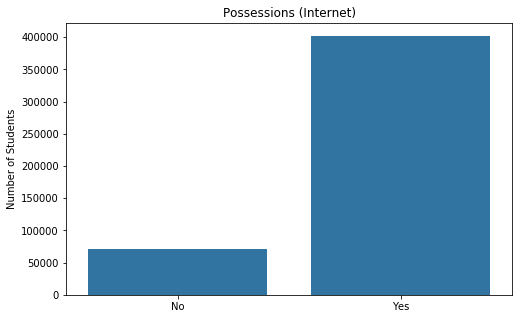

In [57]:
# ST26Q06: Possessions (Internet)
plt.figure(figsize=[8, 5])
base_color = sb.color_palette()[0]
sb.countplot(data=df, x='ST26Q06', color=base_color)
plt.title('Possessions (Internet)')
plt.xlabel('')
plt.ylabel('Number of Students')
plt.show()

The majority of the students are in possession of Internet.

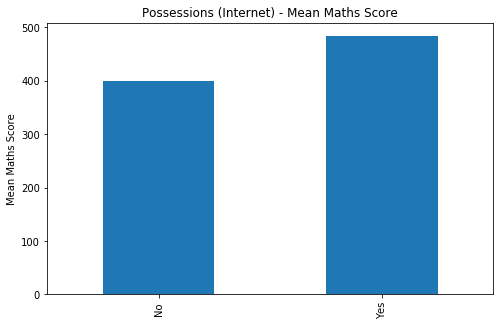

In [58]:
# ST26Q06: Possessions (Internet) - Mean Maths Score
plt.figure(figsize=[8, 5])
df.groupby('ST26Q06').mean()['PV1MATH'].plot(kind='bar')
plt.title('Possessions (Internet) - Mean Maths Score')
plt.xlabel('')
plt.ylabel('Mean Maths Score')
plt.show()

It seems that in general, students with possession of Internet tend to have a better mean maths score (> 50 points) compared to students without possession of their own room.

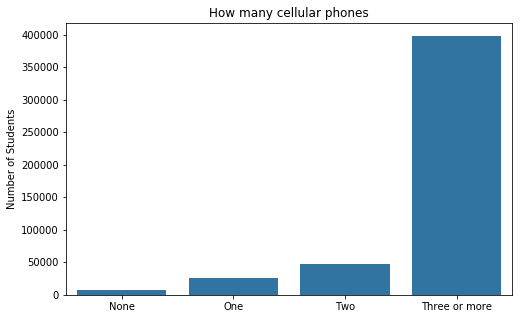

In [59]:
#ST27Q01: How many cellular phones

phone_order = ['None', 'One', 'Two', 'Three or more']
phone_cat = pd.api.types.CategoricalDtype(ordered = True, categories = phone_order)
df['ST27Q01'] = df['ST27Q01'].astype(phone_cat)

plt.figure(figsize=[8, 5])
base_color = sb.color_palette()[0]
sb.countplot(data=df, x='ST27Q01', color=base_color)
plt.title('How many cellular phones')
plt.xlabel('')
plt.ylabel('Number of Students');

This is rather surprising. The majority of the families have three or more cell phones, and the number of students for this category alone is much more than that combined for students with zero, one or two cell phones. This could be due to the ubiquitous nature of the modern cell phone.

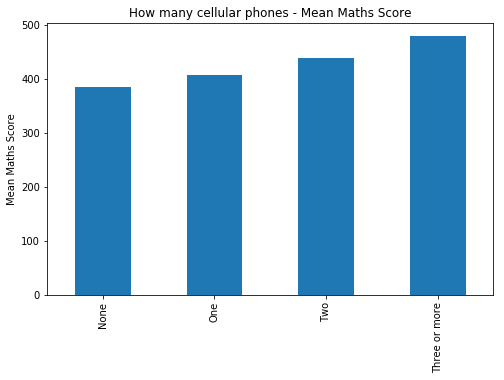

In [60]:
#ST27Q01: How many cellular phones - Mean Maths Score
plt.figure(figsize=[8, 5])
df.groupby('ST27Q01').mean()['PV1MATH'].plot(kind='bar')
plt.title('How many cellular phones - Mean Maths Score')
plt.xlabel('')
plt.ylabel('Mean Maths Score')
plt.show()

It seems that in general, students in families with more cell phones tend to have a better mean maths score.

#### How many televisions

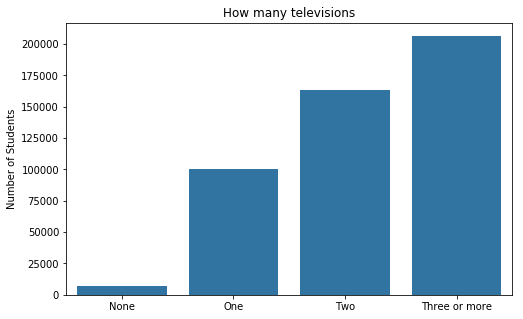

In [61]:
# ST27Q02: How many televisions

tv_order = ['None', 'One', 'Two', 'Three or more']
tv_cat = pd.api.types.CategoricalDtype(ordered = True, categories = tv_order)
df['ST27Q02'] = df['ST27Q02'].astype(tv_cat)

plt.figure(figsize=[8, 5])
base_color = sb.color_palette()[0]
sb.countplot(data=df, x='ST27Q02', color=base_color)
plt.title('How many televisions')
plt.xlabel('')
plt.ylabel('Number of Students');

The majority of the families have three or more TVs. Will this affect the mean maths score of the students (i.e. watching more TV - will it lead to worse maths scores?)

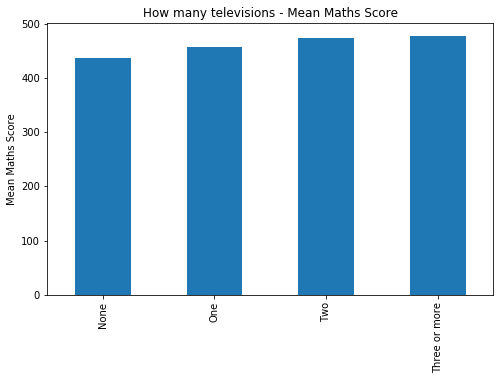

In [62]:
# ST27Q02: How many televisions - Mean Maths Score
plt.figure(figsize=[8, 5])
df.groupby('ST27Q02').mean()['PV1MATH'].plot(kind='bar')
plt.title('How many televisions - Mean Maths Score')
plt.xlabel('')
plt.ylabel('Mean Maths Score')
plt.show()

It seems that in general, students in families with more TVs tend to have a better mean maths score. The difference in mean maths score is not that significant though, as seen from the chart.

#### How many computers

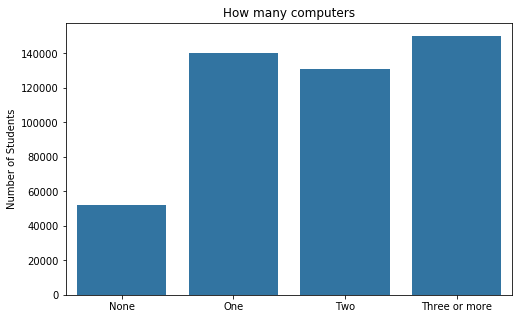

In [63]:
# ST27Q03: How many computers

computer_order = ['None', 'One', 'Two', 'Three or more']
computer_cat = pd.api.types.CategoricalDtype(ordered = True, categories = computer_order)
df['ST27Q03'] = df['ST27Q03'].astype(computer_cat)

plt.figure(figsize=[8, 5])
base_color = sb.color_palette()[0]
sb.countplot(data=df, x='ST27Q03', color=base_color)
plt.title('How many computers')
plt.xlabel('')
plt.ylabel('Number of Students');

The majority of the families have three or more computers, but second in place is 'one computer'. It seems that there are more students with one computer compared with the number of students with two computers.

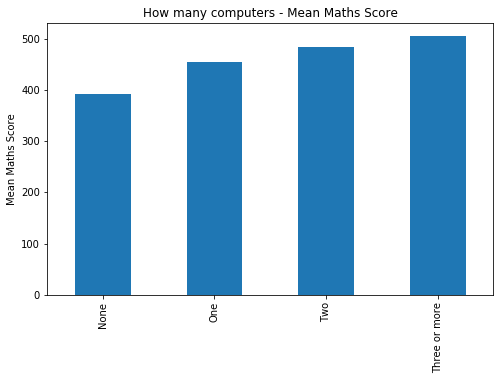

In [64]:
# ST27Q03: How many computers - Mean Maths Score
plt.figure(figsize=[8, 5])
df.groupby('ST27Q03').mean()['PV1MATH'].plot(kind='bar')
plt.title('How many computers - Mean Maths Score')
plt.xlabel('')
plt.ylabel('Mean Maths Score')
plt.show()

It seems that in general, students in families with more computers tend to have a better mean maths score.

#### How many cars

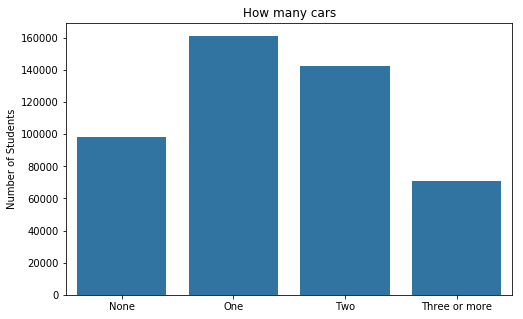

In [65]:
# ST27Q04: How many cars

car_order = ['None', 'One', 'Two', 'Three or more']
car_cat = pd.api.types.CategoricalDtype(ordered = True, categories = car_order)
df['ST27Q04'] = df['ST27Q04'].astype(computer_cat)

plt.figure(figsize=[8, 5])
base_color = sb.color_palette()[0]
sb.countplot(data=df, x='ST27Q04', color=base_color)
plt.title('How many cars')
plt.xlabel('')
plt.ylabel('Number of Students');

The majority of the students stay in families with 1 car, followed by 2 cars, zero cars and three or more cars.

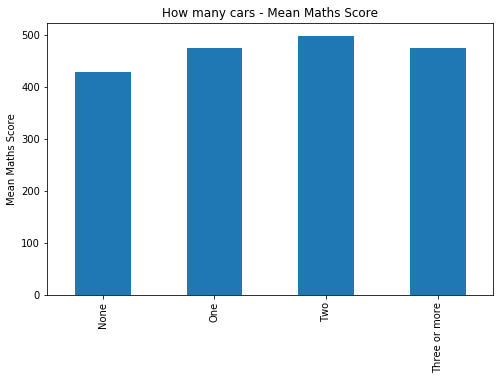

In [66]:
# ST27Q04: How many cars - Mean Maths Score
plt.figure(figsize=[8, 5])
df.groupby('ST27Q04').mean()['PV1MATH'].plot(kind='bar')
plt.title('How many cars - Mean Maths Score')
plt.xlabel('')
plt.ylabel('Mean Maths Score')
plt.show()

It seems that in general, students in families with more cars (up to two cars) tend to have a better mean maths score. Interestingly, the students in families with three or more cars do not have a better mean maths score than those students in families with two cars.

#### How many books

In [67]:
df['ST28Q01'].value_counts()

26-100 books           135184
11-25 books             97335
0-10 books              95042
101-200 books           68350
201-500 books           49267
More than 500 books     28587
Name: ST28Q01, dtype: int64

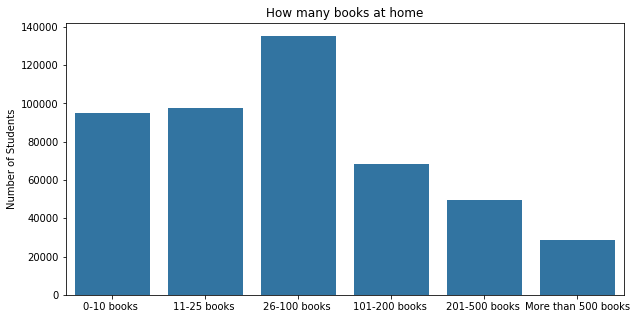

In [68]:
#ST28Q01: How many books at home

book_order = ['0-10 books ', '11-25 books ', '26-100 books ', '101-200 books ', '201-500 books ', 'More than 500 books']
book_cat = pd.api.types.CategoricalDtype(ordered = True, categories = book_order)
df['ST28Q01'] = df['ST28Q01'].astype(book_cat)

plt.figure(figsize=[10, 5])
base_color = sb.color_palette()[0]
sb.countplot(data=df, x='ST28Q01', color=base_color)
plt.title('How many books at home')
plt.xlabel('')
plt.ylabel('Number of Students');

The majority of the students have 26-100 books at home.

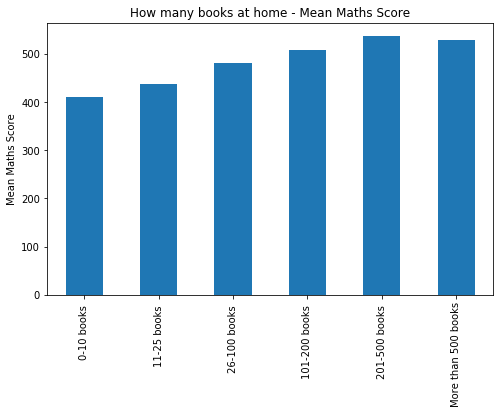

In [69]:
#ST28Q01: How many books at home - Mean Maths Score
plt.figure(figsize=[8, 5])
df.groupby('ST28Q01').mean()['PV1MATH'].plot(kind='bar')
plt.title('How many books at home - Mean Maths Score')
plt.xlabel('')
plt.ylabel('Mean Maths Score')
plt.show()

It seems that in general, students with more books at home have a better mean maths score.

#### Wealth Score
Let's take a look at the wealth scores for OECD and non-OECD countries.

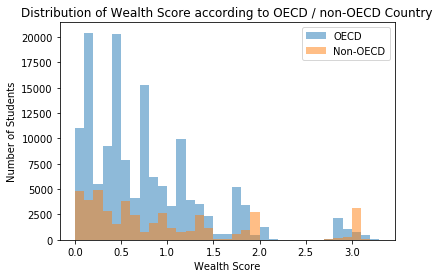

In [70]:
# Histogram for wealth distribution
binsize = 0.1
bins = np.arange(0, df['WEALTH'].max()+binsize, binsize)

plt.hist(data=df[df['OECD']=='OECD'], x='WEALTH', bins = bins, label='OECD', alpha=0.5)
plt.hist(data=df[df['OECD']=='Non-OECD'], x='WEALTH', bins = bins, label='Non-OECD', alpha=0.5)

plt.title('Distribution of Wealth Score according to OECD / non-OECD Country')
plt.xlabel('Wealth Score')
plt.ylabel('Number of Students')
plt.legend()
plt.show()

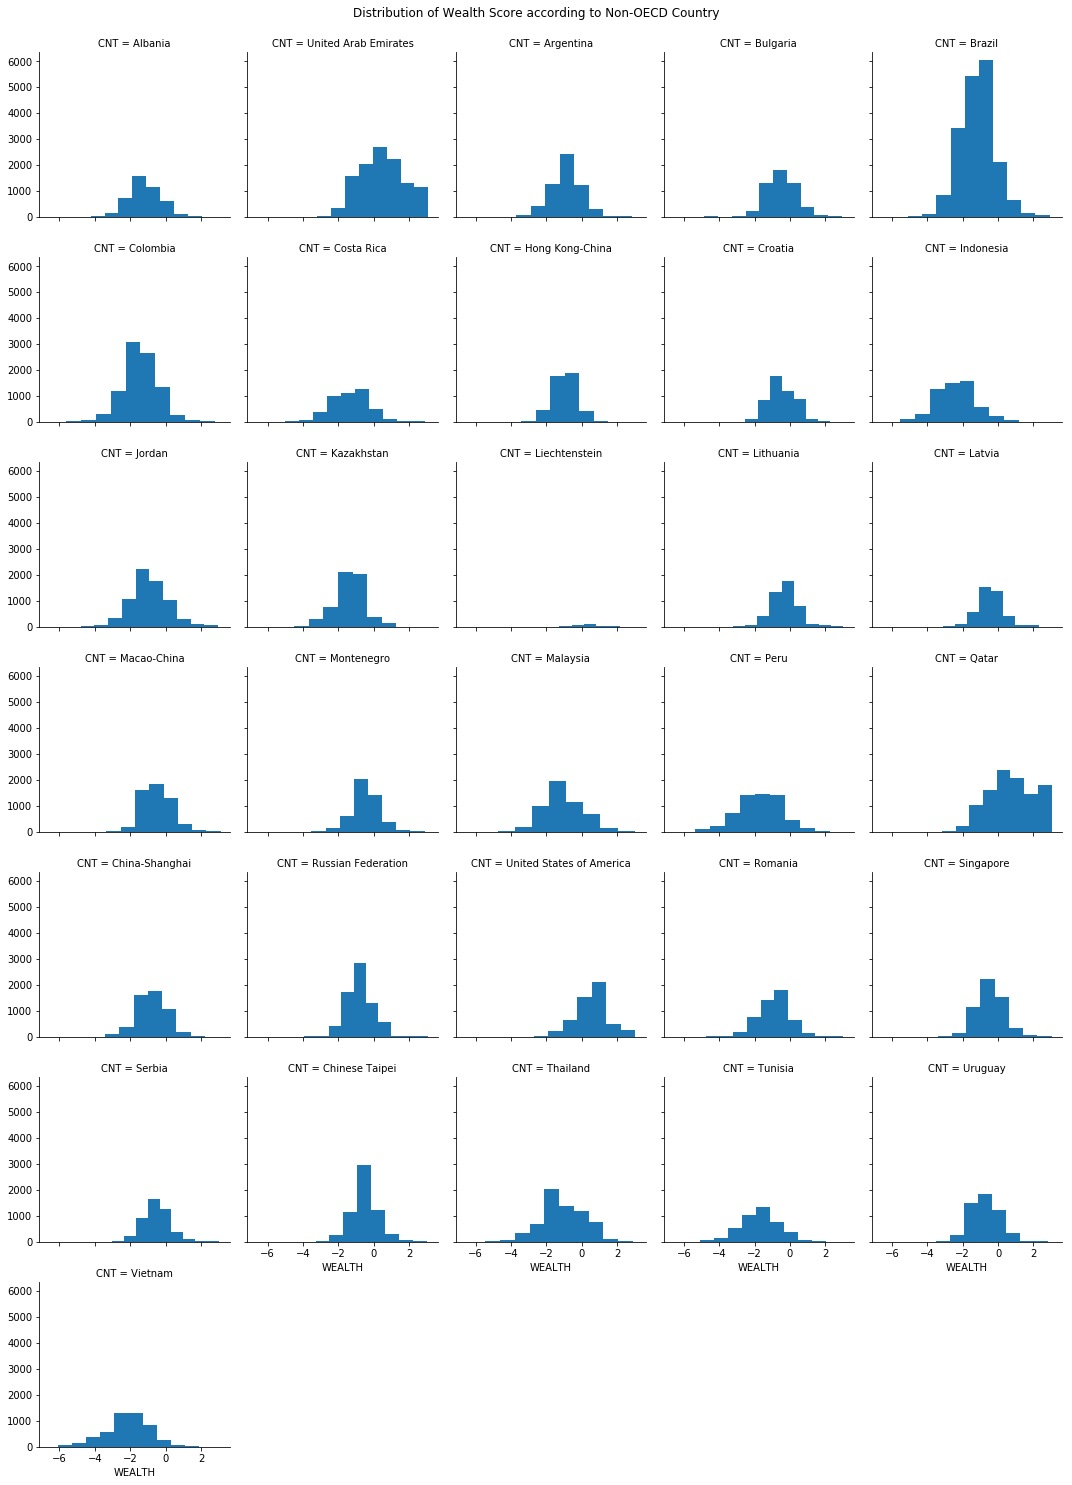

In [71]:
# FacetGrid for distribution of wealth score according to non-OECD country
g = sb.FacetGrid(df[df['OECD']=='Non-OECD'], col='CNT', col_wrap=5, margin_titles=True)
g.map(plt.hist, 'WEALTH')
g.fig.subplots_adjust(top=0.95)
g.fig.suptitle('Distribution of Wealth Score according to Non-OECD Country');

Earlier we saw that the distribution of the mean maths score for Liechtenstein is almost totally flat. Here, we see that its wealth distribution is almost flat as well, in sharp comparison with the other countries.

#### Relationships between scores

Let's investigate to see if there are any relationship between **maths score** and **reading score**.

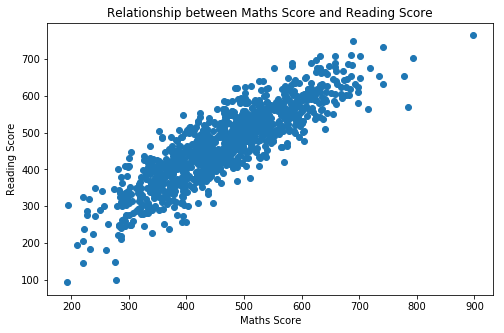

In [72]:
# Sample 1000 students so that plots are clearer and they render faster
samples = np.random.choice(df.shape[0], 1000, replace = False)
df_samp = df.loc[samples,:]

plt.figure(figsize=[8, 5])
plt.scatter(data=df_samp, x='PV1MATH', y='PV1READ')
plt.title('Relationship between Maths Score and Reading Score')
plt.xlabel('Maths Score')
plt.ylabel('Reading Score');

In [73]:
df['PV1MATH'].corr(df['PV1READ'])

0.8571116486183523

Let's add a third variable **Gender** to see if there are any difference in the scatter plot between male and female students.

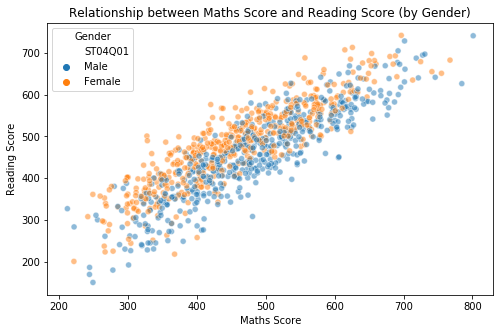

In [74]:
# Sample 1000 students so that plots are clearer and they render faster
samples = np.random.choice(df.shape[0], 1000, replace = False)
df_samp = df.loc[samples,:]

plt.figure(figsize=[8, 5])
sb.scatterplot(data=df_samp, x='PV1MATH', y='PV1READ', hue='ST04Q01', alpha=0.5)
plt.title('Relationship between Maths Score and Reading Score (by Gender)')
plt.xlabel('Maths Score')
plt.ylabel('Reading Score')
plt.legend(title='Gender');

In [75]:
df[(df['ST04Q01']=='Female')]['PV1MATH'].corr(df[(df['ST04Q01']=='Female')]['PV1READ'])

0.8733748826342065

In [76]:
df[(df['ST04Q01']=='Male')]['PV1MATH'].corr(df[(df['ST04Q01']=='Male')]['PV1READ'])

0.8886962950119569

Let's investigate to see if there are any relationship between **maths score** and **science score**.

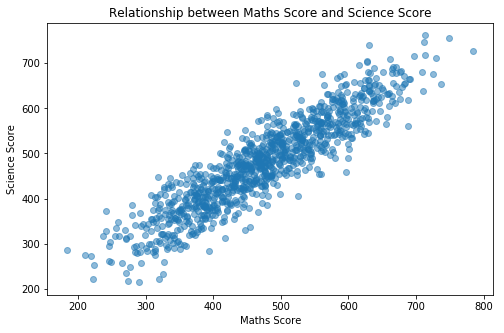

In [77]:
# Sample 1000 students so that plots are clearer and they render faster
samples = np.random.choice(df.shape[0], 1000, replace = False)
df_samp = df.loc[samples,:]

plt.figure(figsize=[8, 5])
plt.scatter(data=df_samp, x='PV1MATH', y='PV1SCIE', alpha=0.5)
plt.title('Relationship between Maths Score and Science Score')
plt.xlabel('Maths Score')
plt.ylabel('Science Score');

In [78]:
df['PV1MATH'].corr(df['PV1SCIE'])

0.9029267391052657

Let's add a third variable Gender to see if there are any difference in the scatter plot between male and female students.

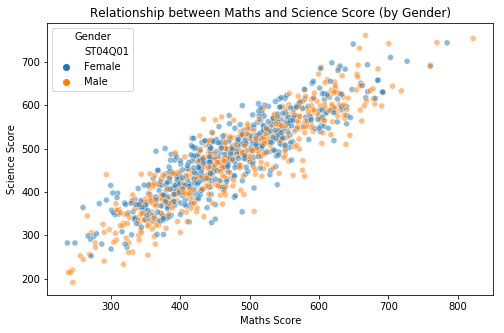

In [79]:
# Sample 1000 students so that plots are clearer and they render faster
samples = np.random.choice(df.shape[0], 1000, replace = False)
df_samp = df.loc[samples,:]

plt.figure(figsize=[8, 5])
sb.scatterplot(data=df_samp, x='PV1MATH', y='PV1SCIE', hue='ST04Q01', alpha=0.5)
plt.title('Relationship between Maths and Science Score (by Gender)')
plt.xlabel('Maths Score')
plt.ylabel('Science Score')
plt.legend(title='Gender');

In [80]:
df[(df['ST04Q01']=='Female')]['PV1MATH'].corr(df[(df['ST04Q01']=='Female')]['PV1SCIE'])

0.8975737594093114

In [81]:
df[(df['ST04Q01']=='Male')]['PV1MATH'].corr(df[(df['ST04Q01']=='Male')]['PV1SCIE'])

0.9098921478388906

Let's investigate to see if there are any relationship between **reading score** and **science score**.

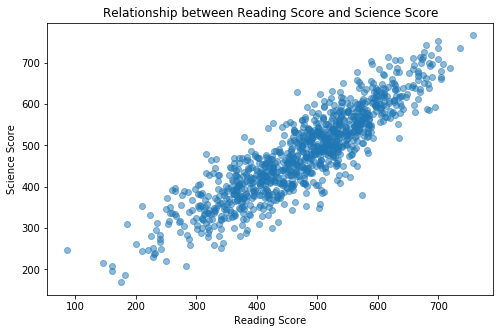

In [82]:
# Sample 1000 students so that plots are clearer and they render faster
samples = np.random.choice(df.shape[0], 1000, replace = False)
df_samp = df.loc[samples,:]

plt.figure(figsize=[8, 5])
plt.scatter(data=df_samp, x='PV1READ', y='PV1SCIE', alpha=0.5)
plt.title('Relationship between Reading Score and Science Score')
plt.xlabel('Reading Score')
plt.ylabel('Science Score');

In [83]:
df['PV1READ'].corr(df['PV1SCIE'])

0.8777275099942696

Let's add a third variable Gender to see if there are any difference in the scatter plot between male and female students.

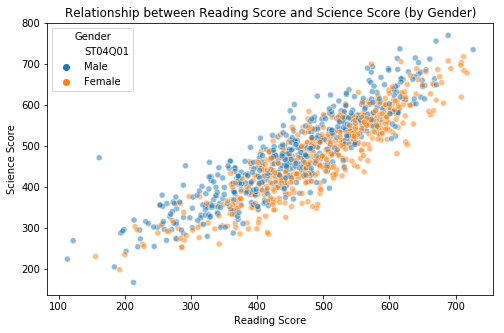

In [84]:
# Sample 1000 students so that plots are clearer and they render faster
samples = np.random.choice(df.shape[0], 1000, replace = False)
df_samp = df.loc[samples,:]

plt.figure(figsize=[8, 5])
sb.scatterplot(data=df_samp, x='PV1READ', y='PV1SCIE', hue='ST04Q01', alpha=0.5)
plt.title('Relationship between Reading Score and Science Score (by Gender)')
plt.xlabel('Reading Score')
plt.ylabel('Science Score')
plt.legend(title='Gender');

In [85]:
df[(df['ST04Q01']=='Female')]['PV1READ'].corr(df[(df['ST04Q01']=='Female')]['PV1SCIE'])

0.8861389067454922

In [86]:
df[(df['ST04Q01']=='Male')]['PV1READ'].corr(df[(df['ST04Q01']=='Male')]['PV1SCIE'])

0.8973808055262528

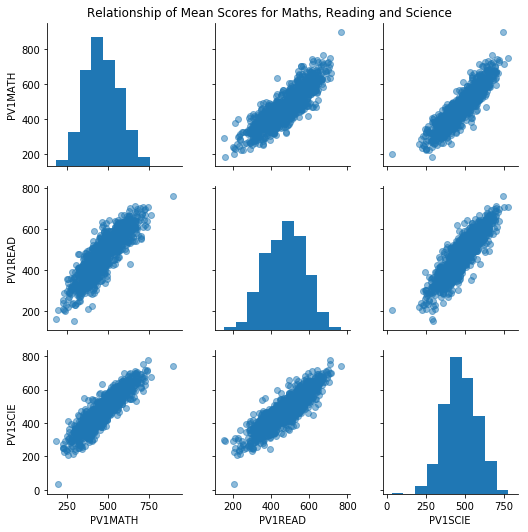

In [87]:
# PairGrid for mean scores

# Sample 1000 students so that plots are clearer and they render faster
samples = np.random.choice(df.shape[0], 1000, replace = False)
df_samp = df.loc[samples,:]

g = sb.PairGrid(data=df_samp, vars = ['PV1MATH', 'PV1READ', 'PV1SCIE'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter, alpha=0.5)
g.fig.subplots_adjust(top=0.95)
g.fig.suptitle('Relationship of Mean Scores for Maths, Reading and Science');

In general, the mean scores for maths, reading and science are all positively correlated strongly with one another. This means that a student who is strong in maths will usually be strong in science and reading as well, and vice versa.

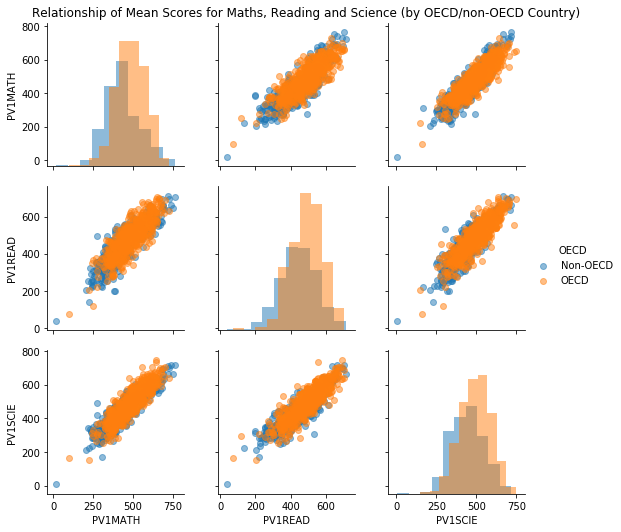

In [88]:
# PairGrid for mean scores (by OECD/non-OECD country)

# Sample 1000 students so that plots are clearer and they render faster
samples = np.random.choice(df.shape[0], 1000, replace = False)
df_samp = df.loc[samples,:]

g = sb.PairGrid(data=df_samp, vars = ['PV1MATH', 'PV1READ', 'PV1SCIE'], hue='OECD')
g.map_diag(plt.hist, alpha=0.5)
g.map_offdiag(plt.scatter, alpha=0.5)
g.add_legend()
g.fig.subplots_adjust(top=0.95)
g.fig.suptitle('Relationship of Mean Scores for Maths, Reading and Science (by OECD/non-OECD Country)');

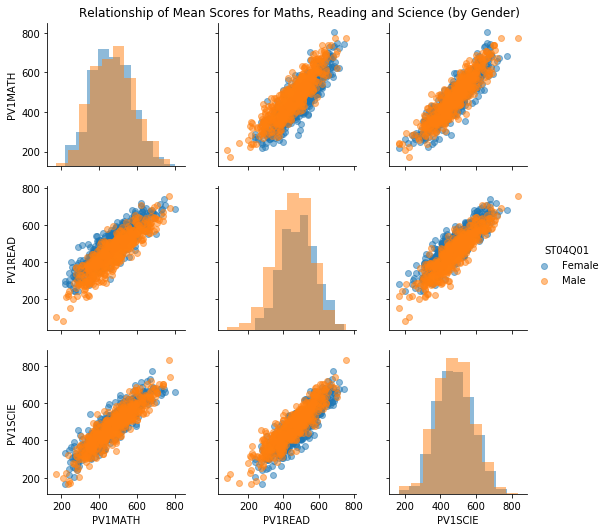

In [89]:
# PairGrid for mean scores (by gender)

# Sample 1000 students so that plots are clearer and they render faster
samples = np.random.choice(df.shape[0], 1000, replace = False)
df_samp = df.loc[samples,:]

g = sb.PairGrid(data=df_samp, vars = ['PV1MATH', 'PV1READ', 'PV1SCIE'], hue='ST04Q01')
g.map_diag(plt.hist, alpha=0.5)
g.map_offdiag(plt.scatter, alpha=0.5)
g.add_legend()
g.fig.subplots_adjust(top=0.95)
g.fig.suptitle('Relationship of Mean Scores for Maths, Reading and Science (by Gender)');

In general, the mean scores for maths, reading and science are all positively correlated strongly with one another. This means that a student who is strong in maths will usually be strong in science and reading as well, and vice versa. There is no significant difference in the trends observed for genders.

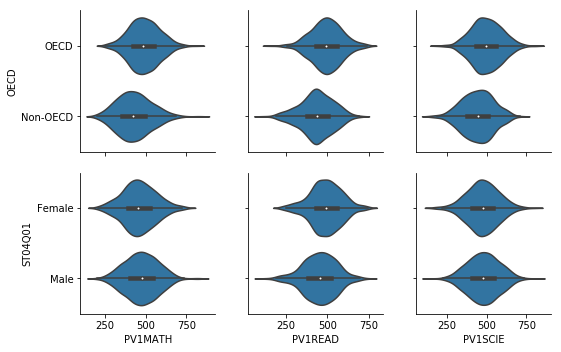

In [90]:
# PairGrid for mean scores

# Sample 1000 students so that plots are clearer and they render faster
samples = np.random.choice(df.shape[0], 1000, replace = False)
df_samp = df.loc[samples,:]

g = sb.PairGrid(data=df_samp, x_vars = ['PV1MATH', 'PV1READ', 'PV1SCIE'], 
               y_vars=['OECD', 'ST04Q01'])
g.map(sb.violinplot);

Here we have some violin plots to visualise the median, 25% and 75% distribution of the scores. We can see that there is a difference in the distribution of the maths scores for OECD and non-OECD countries.

## Summary of Findings

1. **Mean Scores.** The mean maths, reading and science scores are normally distributed overall, with values of 469, 472 and 475 respectively.
<br>
<br>
2. **Gender.** The proportion of male and female students are quite balanced at 49.52% and 50.48% respectively.
<br>
<br>
3. **Distribution of Maths Score by Gender.** Interestingly, it can be observed that the math scores for males and females looks very similar - normally distributed, with similar means (roughly between 400 to 450) and similar range (slightly below 200 to slightly above 800). Overall there does not look to be any significant difference in the math score between the genders, with the small exception of a higher peak for females at the mean (i.e. more female students having mean scores for maths compared to male students)
<br>
<br>
4. **Country.** The top 3 countries with the highest mean maths scores are China-Shanghai, Singapore and Hong Kong-China. The bottom 3 countries with the lowest mean maths scores are Peru, Indonesia and Qatar. Interstingly hey are all non-OECD countries. In terms of maths scores, for OECD countries, the math score looks normally distributed with a mean score around 500, with a peak of more than 20000 students achieving the mean score. For non-OECD countries, the math score looks slightly right-skewed (i.e. more students obtain lower scores). Compared with OECD countries, the mean math score for non-OECD countries looks lower at about 400, with a lower peak of about 15000 students.
<br>
<br>
5. **Educational Qualifications of Parents.** In general, the higher the educational qualification of the parents, the better the mean scores in maths, reading and science for the students.
<br>
<br>
6. **Family Wealth:**
    - **Possessions (own room).** The majority of the students are in possession of their own room. In general, students with possession of their own room tend to have a better mean maths score, but the difference is not significantly large compared to students without possession of their own room.
    - **Possessions (Internet).** The majority of the students are in possession of Internet. In general, students with possession of Internet tend to have a better mean maths score (> 50 points) compared to students without possession of their own room.
    - **Cellular Phones.** The majority of the families have three or more cell phones, and the number of students for this category alone is much more than that combined for students with zero, one or two cell phones. This could be due to the ubiquitous nature of the modern cell phone. In general, students in families with more cell phones tend to have a better mean maths score.
    - **Televisions.** The majority of the families have three or more TVs. In general, students in families with more TVs tend to have a better mean maths score.
    - **Computers.** The majority of the families have three or more computers, but second in place is 'one computer'. It seems that there are more students with one computer compared with the number of students with two computers. In general, students in families with more computers tend to have a better mean maths score.
    - **Cars.** The majority of the students stay in families with 1 car, followed by 2 cars, zero cars and three or more cars. It seems that in general, students in families with more cars (up to two cars) tend to have a better mean maths score. Interestingly, the students in families with three or more cars do not have a better mean maths score than those students in families with two cars.
    - **Books at Home.** The majority of the students have 26-100 books at home. In general, students with more books at home have a better mean maths score.
<br>
<br>    
7. **Wealth Score.** The distribution of the mean maths score for Liechtenstein is almost totally flat. It is noticed that its wealth distribution is almost flat as well, in sharp comparison with the other countries.
<br>
<br>
8. **Relationships between Scores for Maths, Reading and Science.** In general, the mean scores for maths, reading and science are all positively correlated strongly with one another. This means that a student who is strong in maths will usually be strong in science and reading as well, and vice versa. There is no significant difference in the trends observed for genders. When plotted on a violinplot, we are able to see that there is a difference in the distribution of the maths scores for OECD and non-OECD countries.